<a href="https://colab.research.google.com/github/khushishelat/GenderBiasSportsJournalism/blob/Kyle/Tennis_data_EDA_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install gitpython
!pip install -q tensorflow keras

In [ ]:
!pip install wordcloud
!pip install torchtext
!pip install datasets
!pip install tqdm
!pip3 install torch torchvision torchaudio

  Using cached torch-2.1.1-cp310-none-macosx_11_0_arm64.whl.metadata (25 kB)
Using cached torch-2.1.1-cp310-none-macosx_11_0_arm64.whl (59.6 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0
    Uninstalling torch-2.1.0:
      Successfully uninstalled torch-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0 requires torch==2.1.0, but you have torch 2.1.1 which is incompatible.
torchvision 0.16.0 requires torch==2.1.0, but you have torch 2.1.1 which is incompatible.
  Using cached torch-2.1.0-cp310-none-macosx_11_0_arm64.whl.metadata (24 kB)
Using cached torch-2.1.0-cp310-none-macosx_11_0_arm64.whl (59.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.1.1
    Uninstalling torch-2.1.1:
      Successfully uninstalled torch-2.1.1
ERROR: pip's dependency resolver does not currently take into

In [ ]:
import math
import torchtext
import datasets
import re

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, OrderedDict

from copy import deepcopy
from string import punctuation
from random import randint
import numpy as np
from PIL import Image
from git import Repo
from pathlib import Path
from nltk.stem.snowball import SnowballStemmer
from collections.abc import MutableMapping
import collections
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint

import nltk
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm.preprocessing import flatten
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.lm import MLE
from nltk.lm import Laplace
from nltk.lm import KneserNeyInterpolated
from nltk.lm import AbsoluteDiscountingInterpolated
from nltk.lm import StupidBackoff
from nltk.lm import NgramCounter
from nltk.lm import Vocabulary
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.util import trigrams
from nltk.util import pad_sequence

from torch.utils.data import dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.nn import LSTM, GRU
import torch
import torch.nn as nn
import torch.optim as optim
from torch import LongTensor

from tqdm import tqdm

import pyarrow as pa
import pyarrow.dataset as ds
from datasets import Dataset

from torchtext.vocab import vocab
from collections import Counter, OrderedDict

from scipy import stats
from scipy.stats import mannwhitneyu

collections.MutableMapping = MutableMapping

nltk.download('punkt')
nltk.download('stopwords')

/Users/kylesullivan/anaconda3/lib/python3.10/site-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kylesullivan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kylesullivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!python3 -m venv ~/venv-metal
!source ~/venv-metal/bin/activate
!python -m pip install -U pip

In [ ]:
# cities_df = pd.read_csv('/content/world-cities.csv')
# names_df = pd.read_csv('/content/players.csv')
# states_df = pd.read_csv('/content/states.csv')
# state_names_df = pd.read_csv('/content/StateNames.csv')
# nat_names_df = pd.read_csv('/content/NationalNames.csv')
# tok_all_text = pd.read_csv('/content/tok_all_text.csv', low_memory=False)

In [ ]:
cities_df = pd.read_csv('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/names_locations/world-cities.csv')
names_df = pd.read_csv('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/names_locations/players.csv')
states_df = pd.read_csv('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/names_locations/states.csv')
state_names_df = pd.read_csv('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/names_locations/StateNames.csv')
nat_names_df = pd.read_csv('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/names_locations/NationalNames.csv')
tok_all_text = pd.read_csv('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/tennis_data/tok_all_text.csv',
                           low_memory=False)

In [ ]:
temp = tok_all_text[tok_all_text.columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
tok_all_text = []
for sent in temp.to_list():
    tok_all_text.append(sent.split())

In [ ]:
# questions_df = pd.read_json('questions_matchinfo.json', orient='index')
# commentaries_df = pd.read_json('text_commentaries.json')
# transcripts_df = pd.read_json('transcripts_matchinfo.json', orient='index')

In [ ]:
questions_df = pd.read_json('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/tennis_data/questions_matchinfo.json', orient='index')
commentaries_df = pd.read_json('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/tennis_data/text_commentaries.json')
transcripts_df = pd.read_json('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/tennis_data/transcripts_matchinfo.json', orient='index')

# Helper Functions / Background Computations

In [ ]:
def calc_perp(male_perplexities, female_perplexities):
    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(male_perplexities, female_perplexities, alternative='two-sided')

    # Print the results
    # print("U-statistic:", statistic)

    # Check for statistical significance
    alpha = 0.05
    larger_perp = '(male perplexity is greater)' if np.mean(male_perplexities) - np.mean(female_perplexities) >= 0 else '(female perplexity is greater)'
    print("Male Perplexity:          ", round(np.mean(male_perplexities), 1))
    print("Female Perplexity:        ", round(np.mean(female_perplexities), 1))
    print("P-value:                  ", round(p_value, 3))
    print("Statistically Significant:", p_value < alpha, end=' ')
    if p_value < alpha:
        print(larger_perp)
    else:
        print()

    return p_value

In [ ]:
# get word valence, arousal, and dominance scores dataframe
def get_xanew(root=Path.home()/'data/X-ANEW',
              url = 'https://github.com/JULIELab/X-ANEW.git'):

    if not root.is_dir():
        root.mkdir()
        print('Downloading the dataset from github...')
        Repo.clone_from(url, str(root))
    # Repo.clone_from(url, str(root))

    csv = str(root / 'Ratings_Warriner_et_al.csv')
    df = pd.read_csv(csv, index_col=0)
    df=df[['Word','V.Mean.Sum', 'A.Mean.Sum', 'D.Mean.Sum']]
    df.columns=['word', 'valence', 'arousal', 'dominance']
    df.set_index('word',inplace=True)

    return df


# downloads the dataset if necessary and returns a pandas DataFrame
vad_word_df = get_xanew()
vad_word_df

valence  arousal  dominance
word                                    
aardvark        6.26     2.41       4.27
abalone         5.30     2.65       4.95
abandon         2.84     3.73       3.32
abandonment     2.63     4.95       2.64
abbey           5.85     2.20       5.00
...              ...      ...        ...
zone            4.75     3.78       5.23
zoning          4.65     3.77       4.47
zoo             7.00     5.63       6.33
zoom            5.86     5.68       5.90
zucchini        6.30     4.18       6.19

[13915 rows x 3 columns]

In [ ]:
cities_df['cities'] = cities_df['name'].apply(lambda x: x.lower())
cities_df['country'] = cities_df['country'].apply(lambda x: x.lower())
cities_df['subcountry'] = cities_df['subcountry'].apply(lambda x: str(x).lower())

states_df['cities'] = states_df['Cities'].apply(lambda x: str(x).lower())
states_df['states'] = states_df['States'].apply(lambda x: str(x).lower())

state_names_df['Name'] = state_names_df['Name'].apply(lambda x: str(x).lower())
nat_names_df['Name'] = nat_names_df['Name'].apply(lambda x: str(x).lower())

names_df['first_name'] = names_df['first_name'].apply(lambda x: str(x).lower())
names_df['last_name'] = names_df['last_name'].apply(lambda x: str(x).lower())


for p in punctuation:
  cities_df['cities'] = cities_df['cities'].apply(lambda x: str(x).replace(p, ''))
  cities_df['country'] = cities_df['country'].apply(lambda x: str(x).replace(p, ''))
  cities_df['subcountry'] = cities_df['subcountry'].apply(lambda x: str(x).replace(p, ''))
  states_df['cities'] = states_df['Cities'].apply(lambda x: str(x).replace(p, ''))
  states_df['states'] = states_df['States'].apply(lambda x: str(x).replace(p, ''))
  state_names_df['Name'] = state_names_df['Name'].apply(lambda x: str(x).replace(p, ''))
  nat_names_df['Name'] = nat_names_df['Name'].apply(lambda x: str(x).replace(p, ''))
  names_df['first_name'] = names_df['first_name'].apply(lambda x: str(x).replace(p, ''))
  names_df['last_name'] = names_df['last_name'].apply(lambda x: str(x).replace(p, ''))


cities = list(set(cities_df['cities'].to_list()))
countries = list(set(cities_df['country'].to_list()))
subcountries = list(set(cities_df['subcountry'].to_list()))
us_cities = list(set(states_df['cities'].to_list()))
us_states = list(set(states_df['states'].to_list()))
state_names = list(set(state_names_df['Name'].to_list()))
nat_names = list(set(nat_names_df['Name'].to_list()))
first_names = list(set(names_df['first_name'].to_list()))
last_names = list(set(names_df['last_name'].to_list()))

names = []
names.extend(first_names)
names.extend(last_names)
names = list(set(names))
names.extend(state_names)
names = list(set(names))
names.extend(nat_names)
names = list(set(names))

locations = []
locations.extend(cities)
locations.extend(us_cities)
locations = list(set(locations))
locations.extend(us_states)
locations.extend(countries)
locations.extend(subcountries)
locations = list(set(locations))

In [ ]:
contractions = ["we're", "you're", "they're", "there's", "haven't", "doesn't",
                "must've", "could've", "should've", "might've", "wouldn't",
                "couldn't", "would've", "can't", "won't", "isn't", "wasn't",
                "he's", "she's", "he'll", "she'll", "he'd", "she'd", "they've",
                "they'll", "they'd"]

symbols = "',.()!?\"\\/"

questions_words = ' '.join(questions_df.explode(column='questions')['questions']).split()
commentary_words = ' '.join(commentaries_df.explode(column='commentary')['commentary']).split()

my_ques_df = pd.DataFrame(questions_words, columns =['words'])
my_comm_df = pd.DataFrame(commentary_words, columns =['words'])

# make lowercase
my_ques_df['words'] = my_ques_df['words'].apply(lambda x: x.lower())
my_comm_df['words'] = my_comm_df['words'].apply(lambda x: x.lower())

# remove ending punctuation
my_ques_df['words'] = my_ques_df['words'].apply(lambda x: x[0:-1] if x[-1] in symbols else x)
my_comm_df['words'] = my_comm_df['words'].apply(lambda x: x[0:-1] if x[-1] in symbols else x)

# remove punctuation
for p in punctuation:
  my_ques_df['words'] = my_ques_df['words'].apply(lambda x: x.replace(p, '') if x not in contractions else x)
  my_comm_df['words'] = my_comm_df['words'].apply(lambda x: x.replace(p, '') if x not in contractions else x)

# remove duplicates
questions_words = list(set(my_ques_df['words'].to_list()))
commentary_words = list(set(my_comm_df['words'].to_list()))

answers = []
for interview in transcripts_df['QandA'].to_list():
  for qna in interview:
    answers.append(qna[1])

split_words = [words.split() for words in answers]
answers_words = []
for words in split_words:
  for word in words:
    word = word.lower()
    if word[-1] in symbols:
      word = word[0:-1]
    if word not in contractions:
      for p in punctuation:
        word = word.replace(p, '')
    answers_words.append(word)

all_words = []
all_words.extend(list(set(questions_words)))
all_words.extend(list(set(commentary_words)))
all_words.extend(list(set(answers_words)))
all_words = list(set(all_words))

# all_elements = []
# all_elements.extend(questions_words)
# all_elements.extend(commentary_words)
# all_elements.extend(answers_words)

In [ ]:
# Get list of names and gender specific words to remove during EDA

# Explode Questions column
questions_df_cleaned = questions_df.explode(column='questions')

# gender specific words, country-related words, and previous players
manual_remove_words = ['he', 'him', 'his', 'she', 'her', 'hers', "he's", "she's",
                       "he'll", "she'll", "he'd", "she'd", 'man', 'men', 'mens',
                       'woman', 'women', 'womens', 'guy', 'girl', 'guys',
                       'girls', 'male', 'female', 'himself', 'herself',
                       'serenas', 'boris', 'agassi', 'sampras', 'del', 'potro',
                       'atp', 'wta', 'fed', 'agut', 'frenchman', 'swiss',
                       'serb', 'serbian', 'russian', 'french', 'american',
                       'australian', 'canadian', 'spanish', 'spaniard', 'scot',
                       'belarusian', 'brit', 'italian', 'german', 'english',
                       'murrays', 'one', 'two', 'three', 'four', 'five', 'six',
                       'seven', 'eight', 'nine', 'ten', 'japan', 'japanese',
                       'china', 'chinese', 'first', 'second', 'third', 'fourth',
                       'fifth', 'sixth', 'seventh', 'eighth', 'ninth', 'tenth',
                       'london', 'shanghai', 'montecarlo', 'wuhan', 'queens',
                       'melbourne', 'singapore', 'eastbourne', 'york', 'polish',
                       'israel', 'florida', 'pole', 'onetwo', 'andre', 'pete',
                       'dubai', 'istanbul', 'australia', 'vika', 'mcenroe',
                       'barcelona', 'sydney', 'madrid', 'brad', 'jo', 'doha',
                       'england', 'lendl', 'nigel', 'borg', 'gonzlez', 'steffi',
                       'america', 'bernie', 'billie', 'charleston', 'switzerland',
                       'stuttgart', 'aga', 'bestofthree', 'jimmy', 'connors',
                       'jean', 'spain', 'south', 'africa', 'russia', 'germany',
                       'flipkens', 'birmingham', 'twosetter', 'twoset',
                       'threesetter', 'threeset', 'foursetter', 'fourset',
                       'fivesetter', 'fiveset', 'graf', 'laver', 'navratilova',
                       'tony', 'moscow', 'stefan', 'italy', 'ashe', 'evert',
                       'genie', 'romania', 'goran', 'washington', 'cincinnati',
                       'belgium', 'bercy', 'sugarpova', 'montreal', 'toronto',
                       'halle', 'stanford', 'seles', 'hobart', 'san', 'diego',
                       'los', 'angeles', 'york', 'poland', 'achale', 'kooyong',
                       'sunday', 'monday', 'tuesday', 'wednesday', 'thursday',
                       'friday', 'saturday', 'georgia', 'argentina', 'hanburg',
                       'sven', 'california', 'casse', 'etienne', 'federernadal',
                       'gracialopez', 'caas', 'magnus', 'pattaya', 'courier',
                       'turkish', 'loydra', 'sasha', 'petko', 'chernobyl',
                       'rafa', 'llodra', 'knowles', 'fifthset', 'williamses',
                       'golubev', 'shell', 'hogstedt', 'allaster', 'annacone',
                       'dhabi', 'piatti', 'allwilliams', 'ncaas', 'ncaa',
                       'shoaxuan', 'swedes', 'supersaturday', 'ponte', 'gangnam',
                       'belgians', 'belgian', 'stanislas', 'puerto', 'twohour',
                       'roig', 'matsuoka', 'garcialopez', 'ukrainian', 'gstaad',
                       'frenchwoman', 'djoko', 'greek', 'belorussian', 'muzza',
                       'makarvoa', 'zealander', 'berydch', 'wellexecuted',
                       'highquality', 'delpo', 'lpez', 'portuguese', 'rola',
                       'croat', 'dutchman', 'dutchwoman', 'chinatown', 'antwerp',
                       'allrussian', 'duval', 'ghangzou', 'romanians', 'krakow',
                       'brazilian', 'swedish', "they've", "they're", "they's",
                       "they'll", "they'd", "there's", "you", "your", "you're",
                       "there", 'sandiego', 'argentinian', 'qubec', 'hungarian',
                       'iulian']

partial_remove_words = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth',
                        'seventh', 'eighth', 'ninth', 'tenth', 'eleventh',
                        'twelfth', 'thirteenth', 'fourteenth', 'fifteenth',
                        'two', 'three', 'four', 'five', 'six', 'seven', 'eight',
                        'nine']

"""player names from the data (questions and interviews dataframes)"""

# make lowercase
questions_df_cleaned['player'] = questions_df_cleaned['player'].apply(lambda x: x.lower())
transcripts_df['player'] = transcripts_df['player'].apply(lambda x: x.lower())
transcripts_df['opponent'] = transcripts_df['opponent'].apply(lambda x: x.lower())

# remove ending punctuation
questions_df_cleaned['player'] = questions_df_cleaned['player'].apply(lambda x: str(x)[0:-1] if str(x)[-1] in symbols else str(x))
transcripts_df['player'] = transcripts_df['player'].apply(lambda x: str(x)[0:-1] if str(x)[-1] in symbols else str(x))
transcripts_df['opponent'] = transcripts_df['opponent'].apply(lambda x: str(x)[0:-1] if str(x)[-1] in symbols else str(x))

# remove punctation
for p in punctuation:
    questions_df_cleaned['player'] = questions_df_cleaned['player'].apply(lambda x: str(x).replace(p, '') if str(x) not in contractions else x)
    transcripts_df['player'] = transcripts_df['player'].apply(lambda x: str(x).replace(p, '') if str(x) not in contractions else x)
    transcripts_df['opponent'] = transcripts_df['opponent'].apply(lambda x: str(x).replace(p, '') if str(x) not in contractions else x)

# remove duplicates
q_players = list(set(questions_df_cleaned['player'].to_list()))
a_players = list(set(transcripts_df['player'].to_list()))
a_opp_players = list(set(transcripts_df['opponent'].to_list()))

# get first/last names
q_first_names = [player.split()[0] if len(player.split()) > 1 else player.split()[0] for player in q_players]
q_last_names = [player.split()[1] for player in q_players]
a_first_names = [player.split()[0] for player in a_players]
a_last_names = [player.split()[1] for player in a_players]
a_opp_first_names = [player.split()[0] for player in a_opp_players]
a_opp_last_names = [player.split()[1] if len(player.split()) > 1 else player.split()[0] for player in a_opp_players]

# remove duplicates
q_first_names = list(set(q_first_names))
q_last_names = list(set(q_last_names))
a_first_names = list(set(a_first_names))
a_last_names = list(set(a_last_names))
a_opp_first_names = list(set(a_opp_first_names))
a_opp_last_names = list(set(a_opp_last_names))

# combine names and gender specific words into one list of words to be removed
remove_words = manual_remove_words + q_first_names + q_last_names + a_first_names + a_last_names + a_opp_first_names + a_opp_last_names + names + locations
remove_words.extend([word for word in set(all_words) for p_word in partial_remove_words if p_word in word])
remove_words = list(set(remove_words))


# get intersection of remove words and all words
removed_words = list(set(all_words) & set(remove_words))
removed_words_df = pd.DataFrame(removed_words, columns =['words'])

# save the removed words to a dataframe for later use
removed_words_df.to_csv('removed_words.zip', index=False,
          compression=dict(method='zip', archive_name='removed_words.csv')  )

In [ ]:
# function to get words occurring disproportionately with males and females
def get_diff_words(male_words, female_words, remove_words, n_stds,
                   graph_name=None):

  Counter(male_words)

  # lowercase words and remove punctuation
  male_words_cleaned = []
  female_words_cleaned = []

  for pair in Counter(male_words).most_common():
    m_word = pair[0].lower()
    m_count = pair[1]
    if m_word[-1] in symbols:
      m_word = m_word[0:-1]
    if m_word in contractions:
      if (m_word not in removed_words) and (m_word[0:-1] not in removed_words):
          male_words_cleaned.extend([m_word for _ in range(m_count)])
    else:
      if not set(m_word).intersection('0123456789'):
        for p in punctuation:
          m_word = m_word.replace(p, '')
        if (m_word not in removed_words) and (m_word[0:-1] not in removed_words):
          male_words_cleaned.extend([m_word for _ in range(m_count)])

  for pair in Counter(female_words).most_common():
    f_word = pair[0].lower()
    f_count = pair[1]
    if f_word[-1] in symbols:
      f_word = f_word[0:-1]
    if f_word in contractions:
      if (f_word not in removed_words) and (f_word[0:-1] not in removed_words):
          female_words_cleaned.extend([f_word for _ in range(f_count)])
    else:
      if not set(f_word).intersection('0123456789'):
        for p in punctuation:
          f_word = f_word.replace(p, '')
        if (f_word not in removed_words) and (f_word[0:-1] not in removed_words):
          female_words_cleaned.extend([f_word for _ in range(f_count)])

  # rename cleaned list
  male_words = male_words_cleaned
  female_words = female_words_cleaned

  # get list of male and female word count tuples
  male_word_counts = list(dict(Counter(male_words)).values())
  female_word_counts = list(dict(Counter(female_words)).values())

  # get respective desired cutoffs for number of standard deviations above mean
  male_freq_cutoff = n_stds*np.std(male_word_counts) + np.mean(male_word_counts)
  female_freq_cutoff = n_stds*np.std(female_word_counts) + np.mean(female_word_counts)

  if graph_name:
    # print means and standard deviations
    print('-------------------------------------------------------------------')
    print("Male Frequency Mean:", np.mean(male_word_counts))
    print("Female Frequency Mean:", np.mean(female_word_counts))
    print("Male Frequency STD:", np.std(male_word_counts))
    print("Female Frequency STD:", np.std(female_word_counts))
    print('-------------------------------------------------------------------')

  """Remove words that appear in both the mens and womens question data and
  appear a certain number of standard deviations above the mean frequency in
  the combined data set."""

  # get male, female, and an intersection Counters
  male_counter = Counter(male_words)
  female_counter = Counter(female_words)

  # get male/female (word, count) tuple lists and list of intersection words
  male_word_count_list = male_counter.most_common()
  female_word_count_list = female_counter.most_common()

  # get list of intersection words that appear more often than the
  #    designated cutoff
  male_top_inter_list = [i[0] for i in male_word_count_list
                        if i[1] > male_freq_cutoff]

  female_top_inter_list = [i[0] for i in female_word_count_list
                          if i[1] > female_freq_cutoff]

  # take the intersection of the male/female intersection lists
  top_inter_list = list(set(male_top_inter_list) & set(female_top_inter_list))

  # create reduced male and female words lists by removing these high frequency
  #    intersection words
  male_words_red = [[pair[0] for _ in range(pair[1])] for pair in male_word_count_list if pair[0] not in top_inter_list]
  female_words_red = [[pair[0] for _ in range(pair[1])] for pair in female_word_count_list if pair[0] not in top_inter_list]
  male_words_red = [word for sublst in male_words_red for word in sublst]
  female_words_red = [word for sublst in female_words_red for word in sublst]

  # get difference in male and female word lengths
  length_diff = len(male_words_red) - len(female_words_red)

  # randomly remove words from bigger list until both are the same size
  if length_diff > 0:
    for _ in range(length_diff):
      male_words_red.pop(randint(0, len(male_words_red)-1))
  else:
    for _ in range(-length_diff):
      female_words_red.pop(randint(0, len(female_words_red)-1))

  # get counts of reduced lists
  male_reduced_counter = Counter(male_words_red)
  female_reduced_counter = Counter(female_words_red)

  if graph_name:
    # print sizes of each list to make sure they match
    print('Male Word Count:', male_reduced_counter.total())
    print('Female Word Count:', female_reduced_counter.total())
    print('-------------------------------------------------------------------')

  """Time to get the differences when subtracting each of the counts from
  the other."""

  # copy male and female counters
  male_diff_counter = deepcopy(male_reduced_counter)
  female_diff_counter = deepcopy(female_reduced_counter)

  # subtract each from the other to get the difference in counts
  male_diff_counter.subtract(female_reduced_counter)
  female_diff_counter.subtract(male_reduced_counter)

  # get male and female elements from these words more associated with each
  male_elements = sorted(male_diff_counter.elements())
  female_elements = sorted(female_diff_counter.elements())

  # get male and female diff lists of tuple (word, counts)
  male_diff_list = male_diff_counter.most_common()
  female_diff_list = female_diff_counter.most_common()

  if graph_name:

    """Create word clouds for the male/female results"""

    # male world cloud
    male_mask = np.array(Image.open("/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Images/male_symbol.jpg"))
    male_wordcloud = WordCloud(width=10, height=15, mask=male_mask,
                          background_color='navy').fit_words(dict(male_diff_list))

    # female world cloud
    female_mask = np.array(Image.open("/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Images/female_symbol.jpg"))
    female_wordcloud = WordCloud(width=10, height=15, mask=female_mask,
                          background_color='pink').fit_words(dict(female_diff_list))

    # Display the generated word cloud using matplotlib
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))
    ax1.imshow(male_wordcloud.recolor(color_func=male_color_func, random_state=3), interpolation='bilinear')
    ax2.imshow(female_wordcloud.recolor(color_func=female_color_func, random_state=3), interpolation='bilinear')
    ax1.axis('off')
    ax2.axis('off')
    ax1.set_title("Disproportionately Male-Occurring Words", fontsize = 12)
    ax2.set_title("Disproportionately Female-Occurring Words", fontsize = 12)
    if n_stds:
      fig.suptitle(str(graph_name) + " Word Clouds by Gender\n(removed intersection words with freq above {} stds)".format(n_stds), fontsize = 22)
    else:
      fig.suptitle(str(graph_name) + " Word Clouds by Gender\n(removed intersection words with freq above the mean)", fontsize = 22)

  return (male_elements, female_elements), (male_reduced_counter, female_reduced_counter), (male_diff_counter, female_diff_counter)

In [ ]:
def get_avg_vad(male_words, female_words, remove_words, n_stds, graph_name=None):

  diff_counters = get_diff_words(male_words, female_words, remove_words, n_stds)[2]
  stemmer = SnowballStemmer("english")


  output_lst = []
  print('-------------------------------------------------------------------')
  for i, lst in enumerate(diff_counters):
    lst = lst.most_common()
    valence = []
    arousal = []
    dominance = []
    words_included = []
    words_excluded = []
    for word, count in lst:
      if word in vad_word_df.index:
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 1 and word[-1] == 's' and word[0:-1] in vad_word_df.index:
        word = word[0:-1]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 1 and word[-1] == 'y' and word[0:-1] in vad_word_df.index:
        word = word[0:-1]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 2 and word[-2:] == 'ed' and word[0:-2] in vad_word_df.index:
        word = word[0:-2]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 2 and word[-2:] == 'er' and word[0:-2] in vad_word_df.index:
        word = word[0:-2]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 2 and word[-2:] == 'ly' and word[0:-2] in vad_word_df.index:
        word = word[0:-2]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 2 and word[-2:] == 'es' and word[0:-2] in vad_word_df.index:
        word = word[0:-2]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 3 and word[-3:] == 'ing' and word[0:-3] in vad_word_df.index:
        word = word[0:-3]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 3 and word[-3:] == 'ity' and word[0:-3] in vad_word_df.index:
        word = word[0:-3]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 3 and word[-3:] == 'ery' and word[0:-3] in vad_word_df.index:
        word = word[0:-3]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 3 and word[-3:] == 'ant' and word[0:-3] in vad_word_df.index:
        word = word[0:-3]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 3 and word[-3:] == 'ism' and word[0:-3] in vad_word_df.index:
        word = word[0:-3]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 4 and word[-4:] == 'ness' and word[0:-4] in vad_word_df.index:
        word = word[0:-4]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 4 and word[-4:] == 'ment' and word[0:-4] in vad_word_df.index:
        word = word[0:-4]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif len(word) > 4 and word[-4:] == 'ship' and word[0:-4] in vad_word_df.index:
        word = word[0:-4]
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      elif stemmer.stem(word) in vad_word_df:
        word = stemmer.stem(word)
        valence.extend([vad_word_df.loc[word]['valence'] for _ in range(count)])
        arousal.extend([vad_word_df.loc[word]['arousal'] for _ in range(count)])
        dominance.extend([vad_word_df.loc[word]['dominance'] for _ in range(count)])
        words_included.extend([word for word in range(count)])
      else:
        words_excluded.extend([word for word in range(count)])
    output_lst.append((valence, arousal, dominance))

    if i:
      name = "Female"
    else:
      name = "Male"
    print(name + " Percentage of Words Included:", round(len(words_included) /
                                                    (len(words_included) +
                                                    len(words_excluded)), 2))
    print('-------------------------------------------------------------------')

    if not graph_name:
      print(name + " Average Valence:", round(np.mean(valence), 2))
      print(name + " Average Arousal:", round(np.mean(arousal), 2))
      print(name + " Average Dominance:", round(np.mean(dominance), 2))


  if graph_name:

    combined_v = output_lst[0][0] + output_lst[1][0]
    combined_a = output_lst[0][1] + output_lst[1][1]
    combined_d = output_lst[0][2] + output_lst[1][2]
    combined_vad_scores = combined_v + combined_a + combined_d
    combined_vad_labels = ['valence' for _ in range(len(combined_v))] + ['arousal' for _ in range(len(combined_a))] + ['dominance' for _ in range(len(combined_d))]
    combined_g = 3*(['M' for _ in range(len(output_lst[0][0]))] + ['F' for _ in range(len(output_lst[1][0]))])

    df = pd.DataFrame(list(zip(combined_vad_labels, combined_vad_scores, combined_g)),
                columns=['label', 'score', 'gender'])

    # create custom colors array
    colors = ["#001ba1", "#fc90ab"]
    # set custom color palette
    sns.set_palette(sns.color_palette(colors))

    ax = sns.barplot(data=df, x='label', y='score',
                    hue='gender', dodge=True, hue_order=['M', 'F'],
                    estimator="mean", errorbar=None)

    ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10);
    ax.bar_label(ax.containers[1], fmt='%.2f', fontsize=10);

    # Adding labels and title
    plt.xlabel('Word Characteristics', fontsize=12)
    plt.ylabel('Mean Characteristic Score', fontsize=12)
    if n_stds:
      plt.title(str(graph_name) + " Mean Word Characteristic Scores by Gender\n(removed intersection words with freq above {} stds)".format(n_stds), fontsize = 15)
    else:
      plt.title(str(graph_name) + " Mean Word Characteristic Scores by Gender\n(removed intersection words with freq above the mean)", fontsize = 15)

    # Adding a legend
    plt.legend()

    # Display the plot
    plt.show()

  return output_lst

In [ ]:
# Make male/female color functions
def female_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(230, 100%%, %d%%)" % randint(20, 50)

def male_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(5, 55%%, %d%%)" % randint(70, 100)

# Exploring dataframes

Files
-----

* *questions_matchinfo.json* - a JSON file containing the press conference question snippets together with player ranking and game result.
* *transcripts_matchinfo.json* - a JSON file containing full transcripts with more complete match information.
* *text_commentaries.json* - a JSON file containing commentary data.

In [ ]:
questions_df.head()

player gender  result  \
0     Andy Murray      M       1   
1  Kevin Anderson      M       0   
2  Kevin Anderson      M       1   
3    Gilles Simon      M       1   
4    Milos Raonic      M       0   

                                           questions  ranking  
0  [That last set seemed like a faultless perform...      3.0  
1  [What was it like out there, Kevin?, That was ...     17.0  
2  [You were saying courtside you haven't done an...     17.0  
3  [Big serving has been sort of the theme for th...     13.0  
4  [How disappointing is that loss for you?, When...      8.0

In [ ]:
commentaries_df.head()

commentary  \
0  Makarova slumps back into making unforced erro...   
1  Just look in her match with Heather Watson las...   
2  Sharapova saves a break point to hold her serv...   
3  Erakovic is looking superb behind her serve, a...   
4  She can't save another one and Williams is now...   

                    scoreline gender  
0     Sharapova 6-3* Makarova      F  
1  Williams 3-6 2-1* Azarenka      F  
2     Williams *0-2 Sharapova      F  
3        Robson 1-4* Erakovic      F  
4   Williams 2-6 5-1* Lisicki      F

In [ ]:
transcripts_df.head()

QandA  ranking tournament_type  \
0  [[That last set seemed like a faultless perfor...      3.0          ATP500   
1  [[What was it like out there, Kevin?, It was t...     17.0          ATP500   
2  [[You were saying courtside you haven't done a...     17.0          ATP500   
3  [[Big serving has been sort of the theme for t...     13.0          ATP500   
4  [[How disappointing is that loss for you?, The...      8.0          ATP500   

  gender           tournament          player  result       date  \
0      M  AEGON CHAMPIONSHIPS     andy murray       1 2015-06-21   
1      M  AEGON CHAMPIONSHIPS  kevin anderson       0 2015-06-21   
2      M  AEGON CHAMPIONSHIPS  kevin anderson       1 2015-06-20   
3      M  AEGON CHAMPIONSHIPS    gilles simon       1 2015-06-19   
4      M  AEGON CHAMPIONSHIPS    milos raonic       0 2015-06-19   

           stage        opponent  
0      The Final  kevin anderson  
1      The Final     andy murray  
2     Semifinals    gilles simon  
3  Quarterfinals    milos raonic  
4  Quarterfinals    gilles simon

## Questions Data

Post-match press conferences in tennis take place shortly after each match. Players enter a press conference room to face a group of reporters from different news agencies and answer questions posed to them.

This file contains a slightly processed version of the transcript data which we use in our study. It covers a total of 6467 post-match press conferences. Duplicate questions from the same interview are removed.

It is in the form of a JSON file with five fields:
- 'gender': player gender
- 'player': name of the player being interviewed
- 'questions': list of question snippets asked in the press conference. Each entry represents one turn from one reporter.
- 'ranking': ranking of the player
- 'result': 1 indicates the player being interviewed is the match winner; 0 otherwise.

For the full transcript and more complete match information, refer to the transcript data described below.


In [ ]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6467 entries, 0 to 6466
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player     6467 non-null   object 
 1   gender     6467 non-null   object 
 2   result     6467 non-null   int64  
 3   questions  6467 non-null   object 
 4   ranking    6466 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 303.1+ KB


### All Question Data Word Cloud

In [ ]:
commentaries_df['commentary'].iloc[0]

"Makarova slumps back into making unforced errors again as she finds the net with her first forehand of the game, while her second isn't much better as she overhits when attempting to clip the baseline. Sharapova hits an accurate serve down the 'T' to bring up three set points. Another pinpoint serves proves too difficult to return as the number two seed claims the first set."

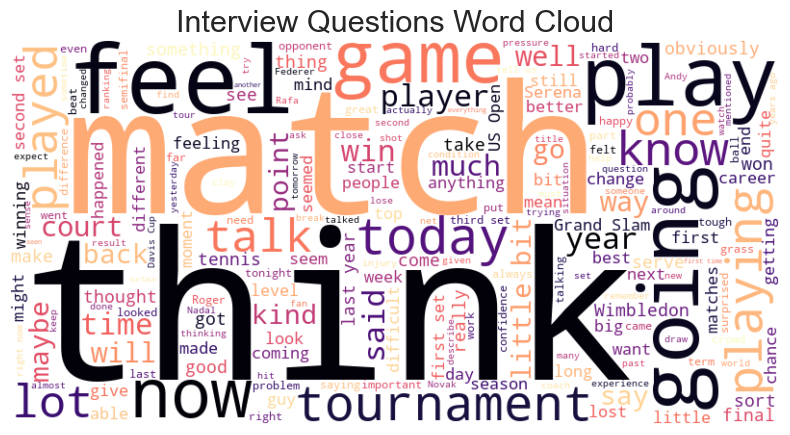

In [ ]:
# All Questions Word Cloud
all_questions_text = ' '.join(questions_df_cleaned['questions'])
all_questions = all_questions_text.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      colormap=sns.color_palette("magma", as_cmap=True),
                      background_color='white').generate(all_questions_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Interview Questions Word Cloud', fontsize = 22)
plt.show()

### Gender Specific Question Data Word Clouds

In [ ]:
# filter into mens and womens data
questions_m_df_cleaned = questions_df_cleaned[questions_df_cleaned['gender'] == 'M']
questions_f_df_cleaned = questions_df_cleaned[questions_df_cleaned['gender'] == 'F']
male_question_text = ' '.join(questions_m_df_cleaned['questions'])
female_question_text = ' '.join(questions_f_df_cleaned['questions'])

# convert male and female words into lists
male_question_words = male_question_text.split()
female_question_words = female_question_text.split()

-------------------------------------------------------------------
Male Frequency Mean: 36.454384687402474
Female Frequency Mean: 33.96903062399263
Male Frequency STD: 274.5749864840451
Female Frequency STD: 245.2484623277925
-------------------------------------------------------------------
Male Word Count: 98110
Female Word Count: 98110
-------------------------------------------------------------------


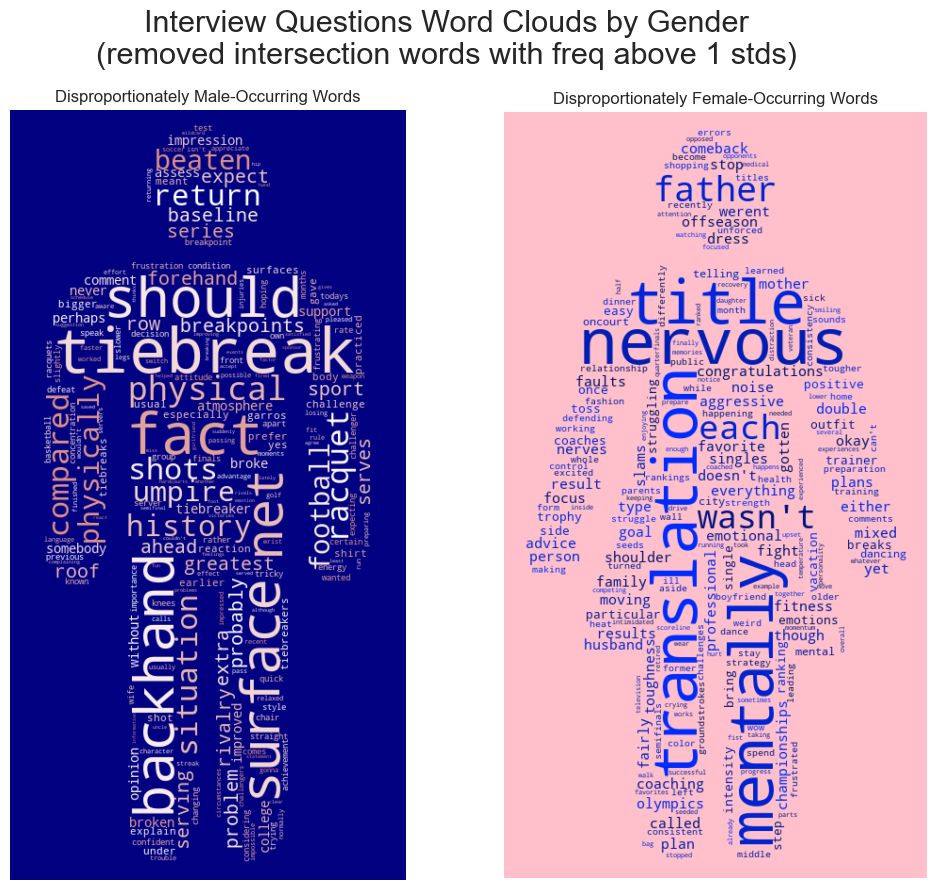

In [ ]:
question_elements_1std, question_counters_1std, question_diff_lists_1std = \
get_diff_words(male_question_words, female_question_words, remove_words, 1, 'Interview Questions')

-------------------------------------------------------------------
Male Frequency Mean: 36.454384687402474
Female Frequency Mean: 33.96903062399263
Male Frequency STD: 274.5749864840451
Female Frequency STD: 245.2484623277925
-------------------------------------------------------------------
Male Word Count: 36062
Female Word Count: 36062
-------------------------------------------------------------------


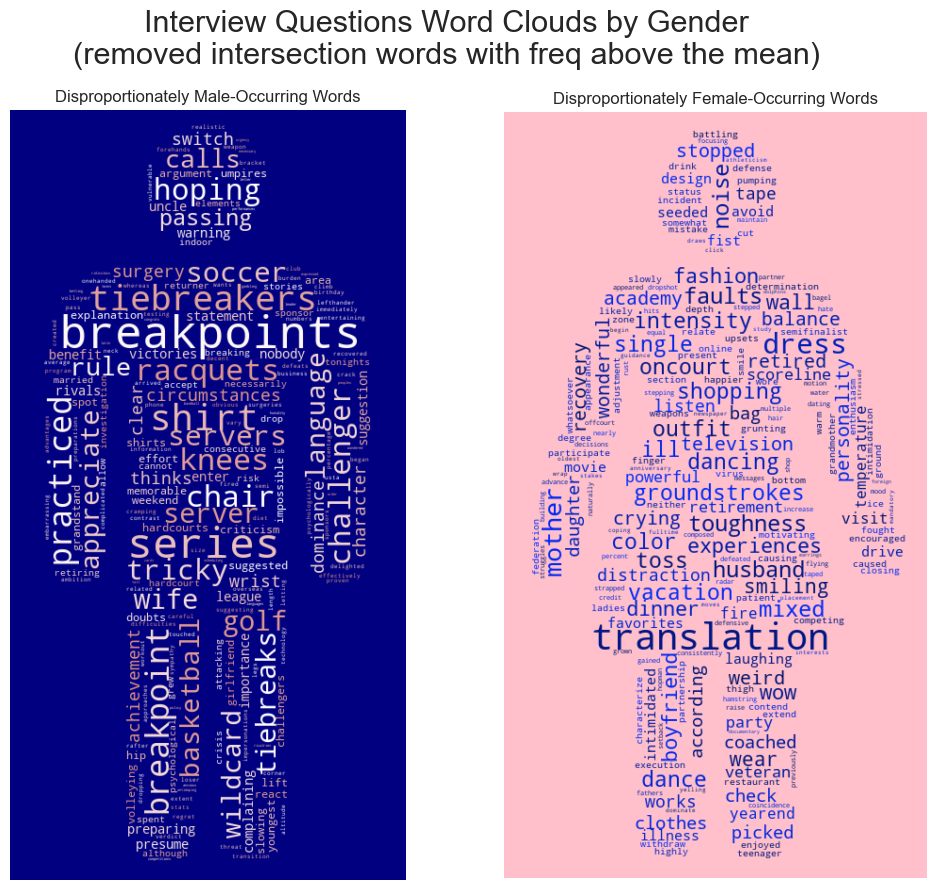

In [ ]:
question_elements_0std, question_counters_0std, question_diff_lists_0std = \
get_diff_words(male_question_words, female_question_words, remove_words, 0, 'Interview Questions')

-------------------------------------------------------------------
Male Frequency Mean: 36.454384687402474
Female Frequency Mean: 33.96903062399263
Male Frequency STD: 274.5749864840451
Female Frequency STD: 245.2484623277925
-------------------------------------------------------------------
Male Word Count: 3872
Female Word Count: 3872
-------------------------------------------------------------------


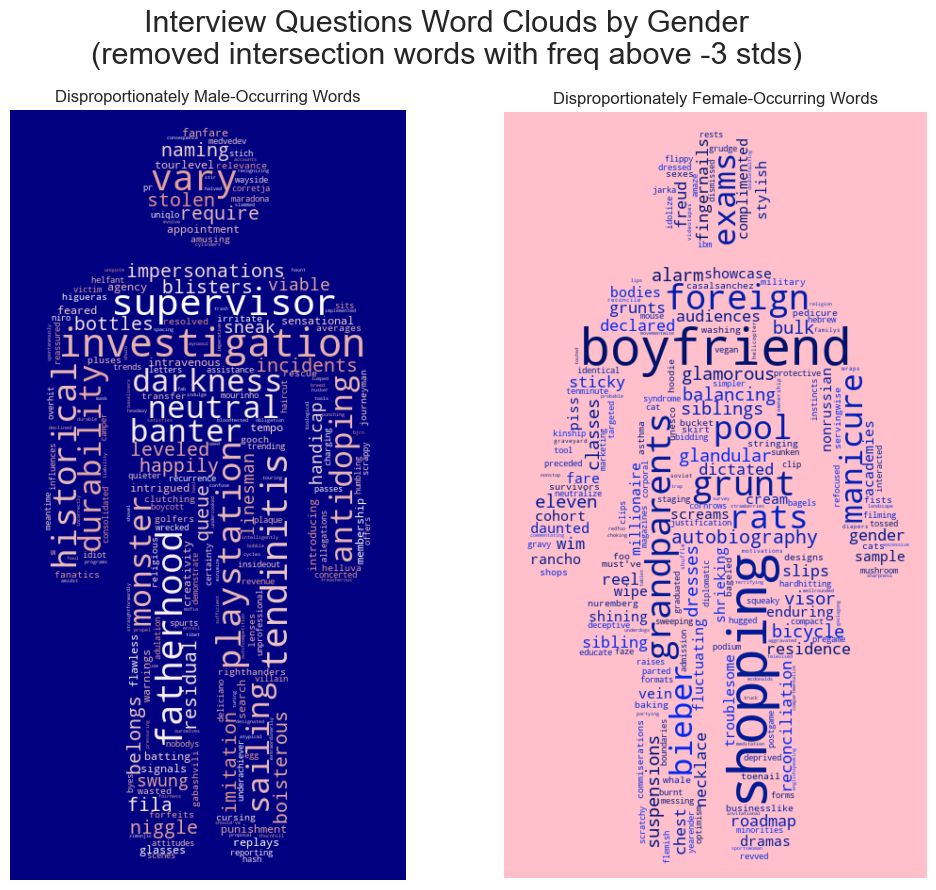

In [ ]:
question_elements_neg_3std, question_counters_neg_3std, question_diff_lists_neg_3std = \
get_diff_words(male_question_words, female_question_words, remove_words, -3, 'Interview Questions')

### Mean Word Characteristic Scores by Gender

-------------------------------------------------------------------
Male Percentage of Words Included: 0.68
-------------------------------------------------------------------
Female Percentage of Words Included: 0.72
-------------------------------------------------------------------


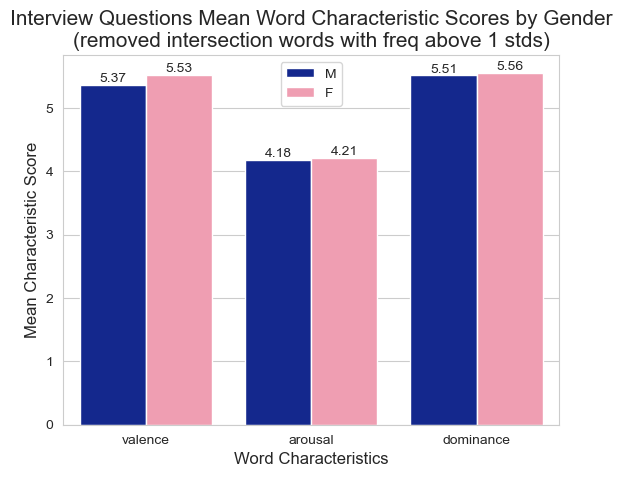

In [ ]:
# after removing the intersection of words appearing more than one standard
#    deviation from the mean in both the men's and women's questions, we take
#    the mean word characteristic score of the difference in counts to see how
#    words more commonly used to describe men deviate from those more commonly
#    used to describe women.
male_triple, female_triple = get_avg_vad(male_question_words, female_question_words, remove_words,
                                         1, 'Interview Questions')

-------------------------------------------------------------------
Male Percentage of Words Included: 0.69
-------------------------------------------------------------------
Female Percentage of Words Included: 0.7
-------------------------------------------------------------------


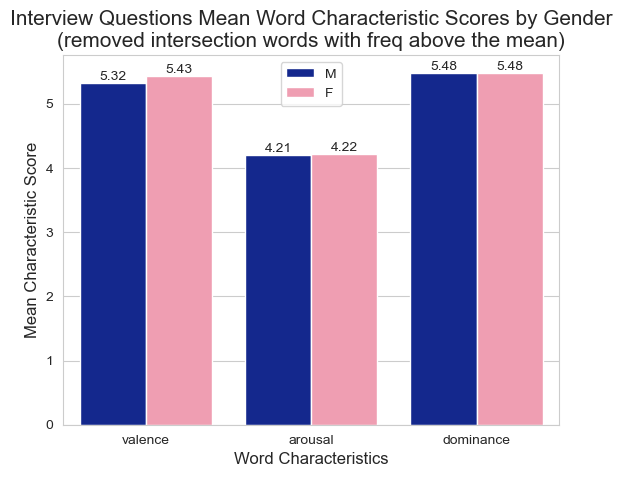

In [ ]:
male_triple, female_triple = get_avg_vad(male_question_words, female_question_words, remove_words,
                                         0, 'Interview Questions')

-------------------------------------------------------------------
Male Percentage of Words Included: 0.56
-------------------------------------------------------------------
Female Percentage of Words Included: 0.57
-------------------------------------------------------------------


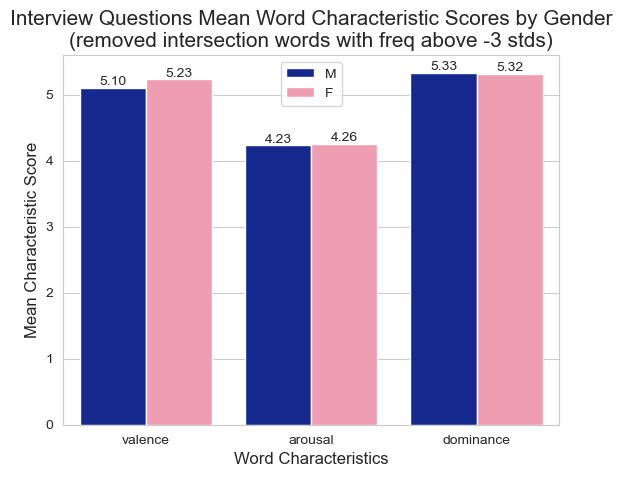

In [ ]:
male_triple, female_triple = get_avg_vad(male_question_words, female_question_words, remove_words,
                                         -3, 'Interview Questions')

### Number of Questions Per Ranking For Male and Female Players

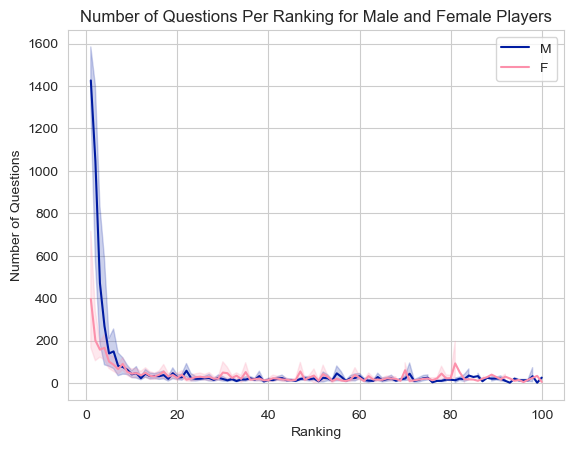

In [ ]:
# Questions per rank and gender (top 100 players)
question_counts = questions_df_cleaned.groupby(by=["player", "ranking", "gender"])[['questions']].count().reset_index()
top_100 = question_counts[question_counts['ranking']<=100]
sns.lineplot(data=top_100, x='ranking', y='questions', hue='gender')

# Adding labels and title
plt.xlabel('Ranking')
plt.ylabel('Number of Questions')
plt.title('Number of Questions Per Ranking for Male and Female Players')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

### Number of Questions for Male and Female Players in the Top 5

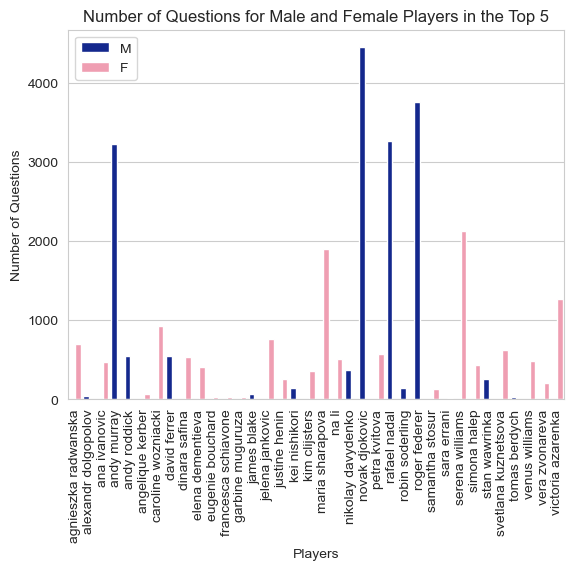

In [ ]:
# Questions per rank and gender (top 100 players)
question_counts = questions_df_cleaned.groupby(by=["player", "ranking", "gender"])[['questions']].count().reset_index()
top_5 = question_counts[question_counts['ranking']<=5]
top_5 = top_5.groupby(['player', 'gender'])[['questions']].sum().reset_index()
sns.barplot(data=top_5, x='player', y='questions', hue='gender', hue_order=['M', 'F'])

# create custom colors array
colors = ["#001ba1", "#fc90ab"]
# set custom color palette
sns.set_palette(sns.color_palette(colors))

# Adding labels and title
plt.xlabel('Players')
plt.xticks(rotation=90)
plt.ylabel('Number of Questions')
plt.title('Number of Questions for Male and Female Players in the Top 5')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

## Commentaries Data

The commentary data contains 3962 pieces of live-text play-by-play commentaries, split evenly between men and women singles matches. It is a JSON file with three fields:

	- 'commentary': the actual text from the live updates. It describes the process of the game.
	- 'gender': 'F' indicates the update is from a women's match; 'M' means it is from men's game.
	- 'scoreline': the score when the text update is posted. * indicates the player who is serving at the moment.

While we used Sports Mole's commentaries for our study, ByTheMinute could be another source to gather similar data.



In [ ]:
commentaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   commentary  3962 non-null   object
 1   scoreline   3962 non-null   object
 2   gender      3962 non-null   object
dtypes: object(3)
memory usage: 93.0+ KB


In [ ]:
commentaries_df['commentary']

0       Makarova slumps back into making unforced erro...
1       Just look in her match with Heather Watson las...
2       Sharapova saves a break point to hold her serv...
3       Erakovic is looking superb behind her serve, a...
4       She can't save another one and Williams is now...
                              ...                        
3957    That's more promising from the Russian, who se...
3958    A sharp backhand volley hands Azarenka the ope...
3959    Azarenka is serving to stay in the set, and th...
3960    The power on show in some of these rallies wou...
3961    That could be the game that breaks the resolve...
Name: commentary, Length: 3962, dtype: object

In [ ]:
commentaries_df['commentary'].explode()[0]

"Makarova slumps back into making unforced errors again as she finds the net with her first forehand of the game, while her second isn't much better as she overhits when attempting to clip the baseline. Sharapova hits an accurate serve down the 'T' to bring up three set points. Another pinpoint serves proves too difficult to return as the number two seed claims the first set."

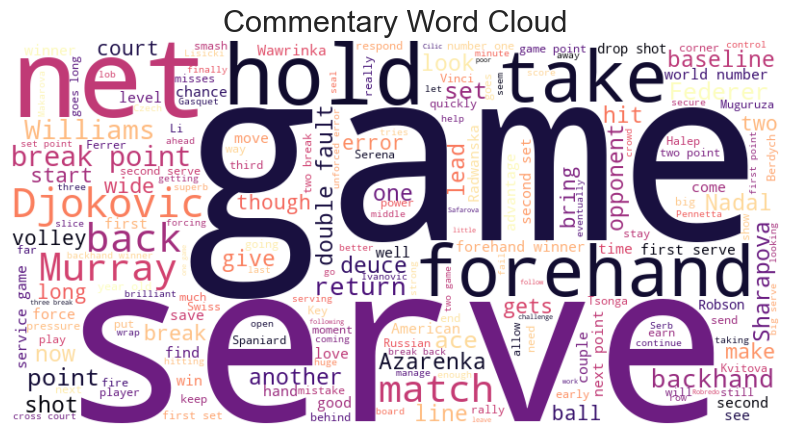

In [ ]:
# All Commentary Word Cloud
all_commentary_text = ' '.join(commentaries_df['commentary'])
all_commentary = all_commentary_text.split()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      colormap=sns.color_palette("magma", as_cmap=True),
                      background_color='white').generate(all_commentary_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Commentary Word Cloud', fontsize = 22)
plt.show()

### Gender Specific Commentary Data Word Clouds

In [ ]:
# Remove gender specific words, player names, case, and punctuation.

# filter into mens and womens data
commentary_m_df = commentaries_df[commentaries_df['gender'] == 'M']
commentary_f_df = commentaries_df[commentaries_df['gender'] == 'F']
male_commentary_text = ' '.join(commentary_m_df['commentary'])
female_commentary_text = ' '.join(commentary_f_df['commentary'])

# convert male and female words into lists
male_commentary_words = male_commentary_text.split()
female_commentary_words = female_commentary_text.split()

-------------------------------------------------------------------
Male Frequency Mean: 12.92087542087542
Female Frequency Mean: 13.947201689545935
Male Frequency STD: 61.39063640016673
Female Frequency STD: 66.50006836055333
-------------------------------------------------------------------
Male Word Count: 17306
Female Word Count: 17306
-------------------------------------------------------------------


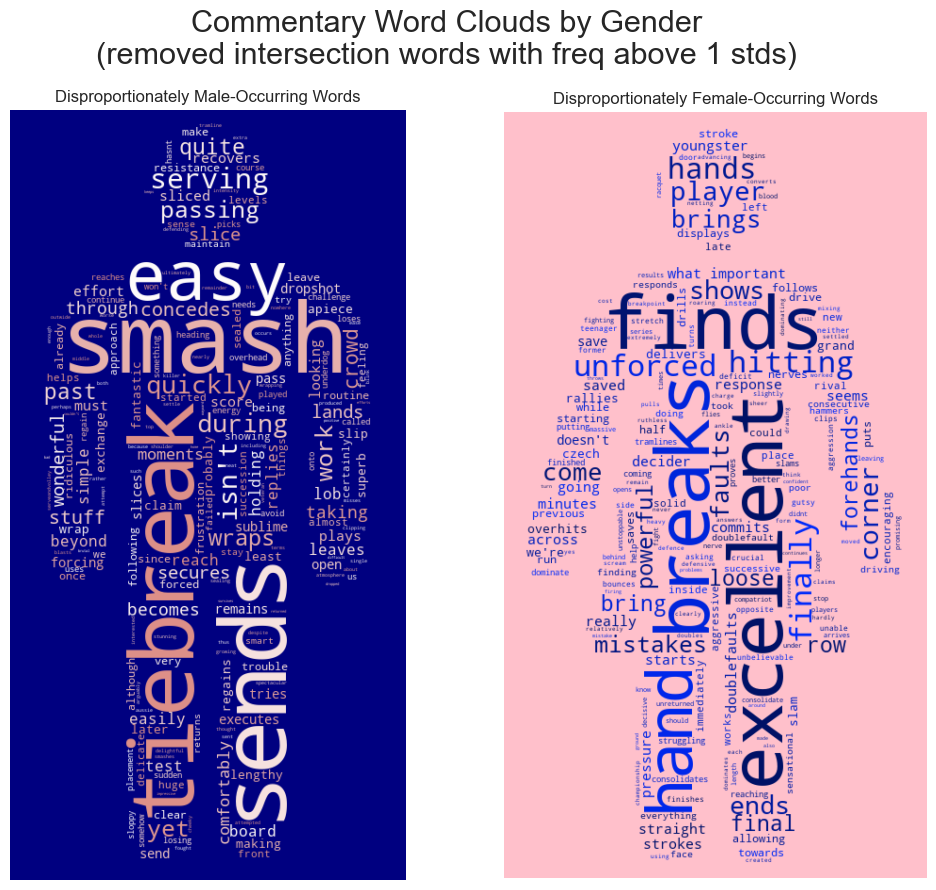

In [ ]:
comm_elements_1std, comm_counters_1std, comm_diff_lists_1std = \
get_diff_words(male_commentary_words, female_commentary_words, remove_words, 1, 'Commentary')

-------------------------------------------------------------------
Male Frequency Mean: 12.92087542087542
Female Frequency Mean: 13.947201689545935
Male Frequency STD: 61.39063640016673
Female Frequency STD: 66.50006836055333
-------------------------------------------------------------------
Male Word Count: 7605
Female Word Count: 7605
-------------------------------------------------------------------


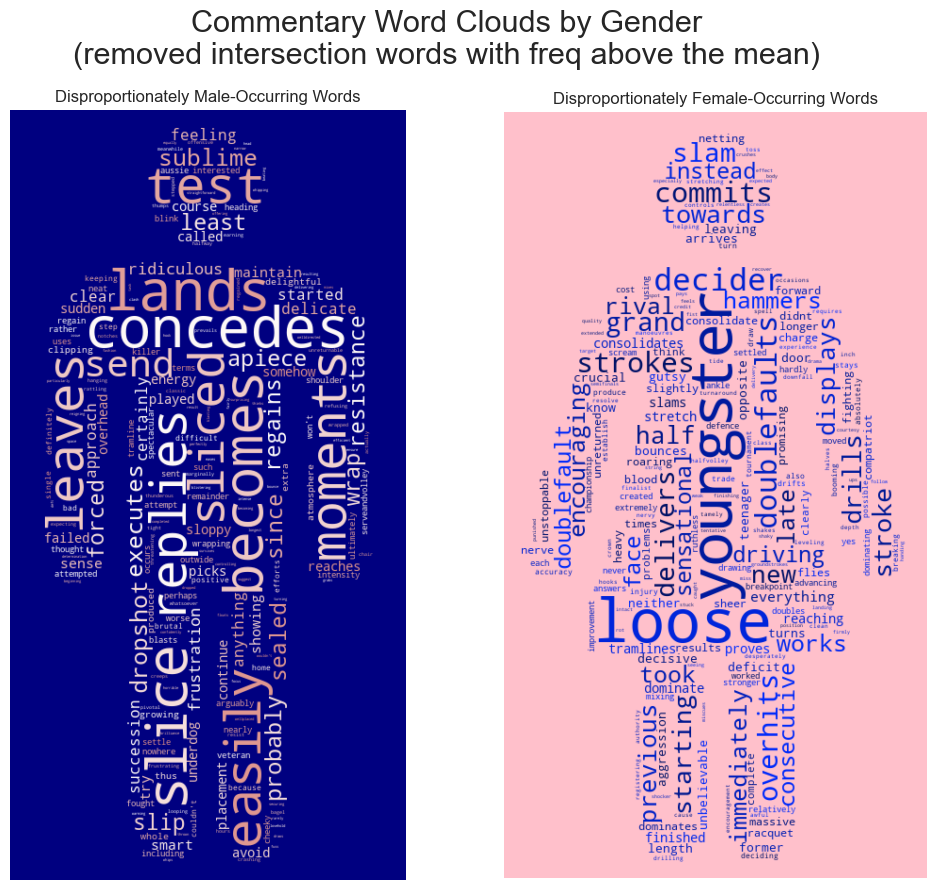

In [ ]:
comm_elements_0std, comm_counters_0std, comm_diff_lists_0std = \
get_diff_words(male_commentary_words, female_commentary_words, remove_words, 0, 'Commentary')

-------------------------------------------------------------------
Male Frequency Mean: 12.92087542087542
Female Frequency Mean: 13.947201689545935
Male Frequency STD: 61.39063640016673
Female Frequency STD: 66.50006836055333
-------------------------------------------------------------------
Male Word Count: 1248
Female Word Count: 1248
-------------------------------------------------------------------


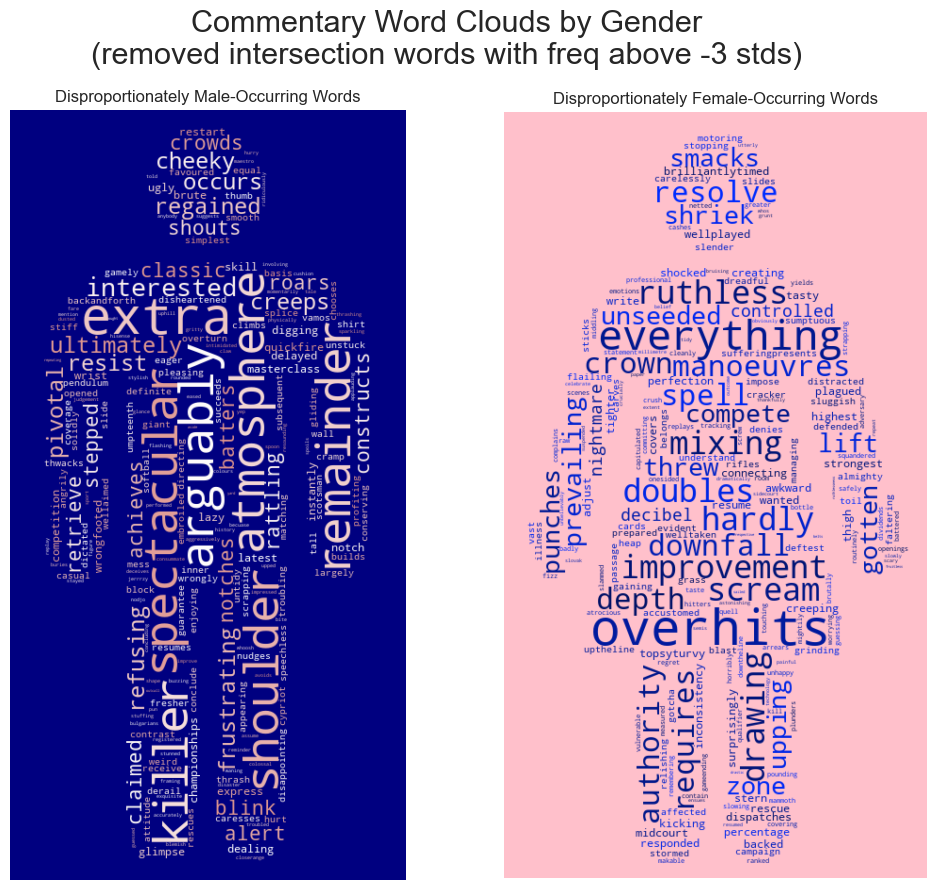

In [ ]:
comm_elements_neg_3std, comm_counters_neg_3std, comm_diff_lists_neg_3std = \
get_diff_words(male_commentary_words, female_commentary_words, remove_words, -3, 'Commentary')

### Mean Word Characteristic Scores by Gender

-------------------------------------------------------------------
Male Percentage of Words Included: 0.67
-------------------------------------------------------------------
Female Percentage of Words Included: 0.73
-------------------------------------------------------------------


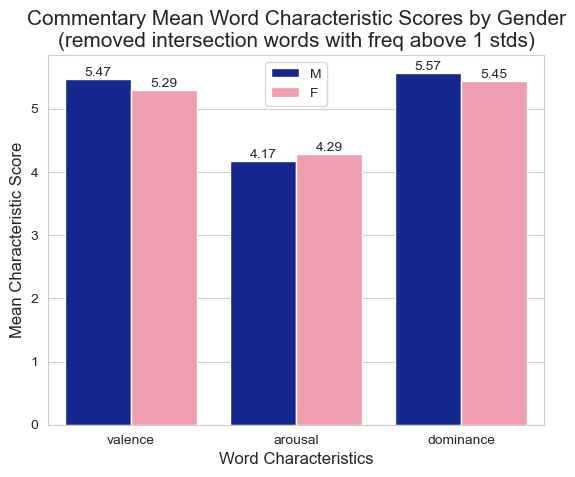

In [ ]:
# after removing the intersection of words appearing more than one standard
#    deviation from the mean in both the men's and women's commentary, we take
#    the mean word characteristic score of the difference in counts to see how
#    words more commonly used to describe men deviate from those more commonly
#    used to describe women.
male_triple, female_triple = get_avg_vad(male_commentary_words, female_commentary_words, remove_words,
                                         1, 'Commentary')

-------------------------------------------------------------------
Male Percentage of Words Included: 0.68
-------------------------------------------------------------------
Female Percentage of Words Included: 0.71
-------------------------------------------------------------------


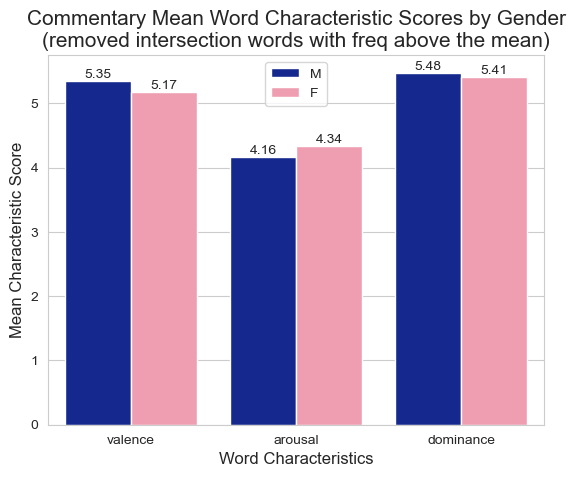

In [ ]:
male_triple, female_triple = get_avg_vad(male_commentary_words, female_commentary_words, remove_words,
                                         0, 'Commentary')

-------------------------------------------------------------------
Male Percentage of Words Included: 0.66
-------------------------------------------------------------------
Female Percentage of Words Included: 0.67
-------------------------------------------------------------------


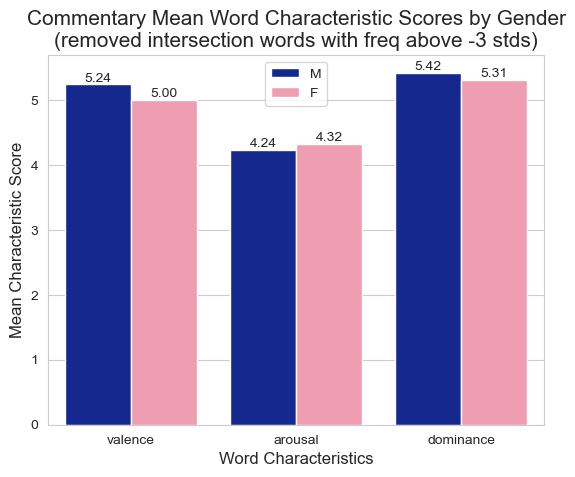

In [ ]:
male_triple, female_triple = get_avg_vad(male_commentary_words, female_commentary_words, remove_words,
                                         -3, 'Commentary')

### Number of Commentaries for Male and Female Players

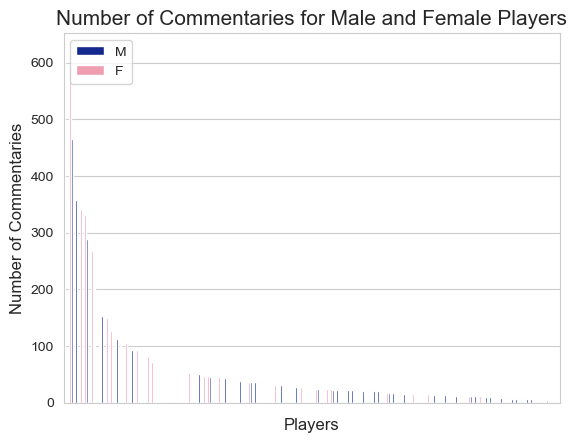

In [ ]:
# combine players into a single column to explore how interviews are divided up

# get two players columns
commentaries_df['player1'] = commentaries_df['scoreline'].apply(lambda x: x.split()[0].replace('*', ''))
commentaries_df['player2'] = commentaries_df['scoreline'].apply(lambda x: x.split()[len(x.split())-1].replace('*', ''))

# concat the dataframe with itself with one combined player column
df1 = commentaries_df
df1 = df1.drop(columns='player2')
df1 = df1.rename(columns={'player1':'player'})
df2 = commentaries_df
df2 = df2.drop(columns='player1')
df2 = df2.rename(columns={'player2':'player'})
frames = [df1, df2]
combined_commentaries_df = pd.concat(frames)
player_comm_feq_df = combined_commentaries_df.groupby(by=["player", "gender"])[['commentary']].count().reset_index()
player_comm_feq_df = player_comm_feq_df.sort_values(by='commentary', ascending=False)

# Commentaries per player by gender

# create custom colors array
colors = ["#001ba1", "#fc90ab"]
# set custom color palette
sns.set_palette(sns.color_palette(colors))

g1 = sns.barplot(data=player_comm_feq_df, x='player', y='commentary',
                 hue='gender', hue_order=['M', 'F'])
g1.tick_params(bottom=False)
g1.set(xticklabels=[])

# Adding labels and title
plt.xlabel('Players', fontsize=12)
plt.ylabel('Number of Commentaries', fontsize=12)
plt.title('Number of Commentaries for Male and Female Players', fontsize = 15)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

### Players with the Most Commentaries

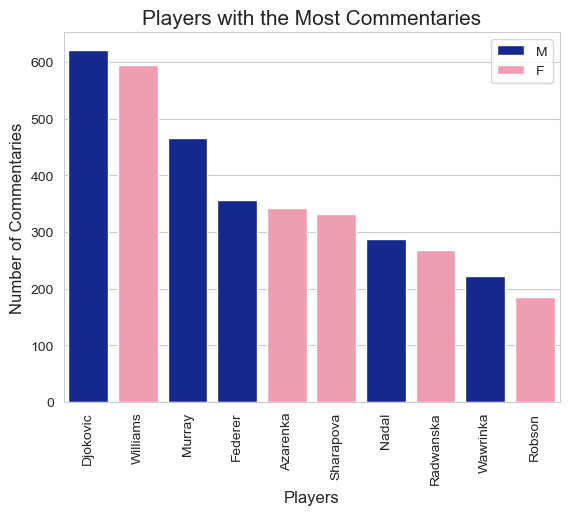

In [ ]:
# The players with the most commentaries (10 most)
top_player_comm_freq_df = player_comm_feq_df[0:10]

# create custom colors array
colors = ["#001ba1", "#fc90ab"]
# set custom color palette
sns.set_palette(sns.color_palette(colors))

g1 = sns.barplot(data=top_player_comm_freq_df, x='player', y='commentary', hue='gender',
                 dodge=False, hue_order=['M', 'F'])

# Adding labels and title
plt.xlabel('Players', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Number of Commentaries', fontsize=12)
plt.title('Players with the Most Commentaries', fontsize=15)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

### Comentary Word Count Distribution by Gender

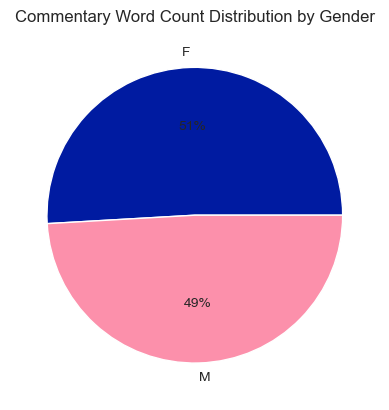

In [ ]:
# explore how the number of words are divded up among male/female commentaries
commentaries_df[['commentary', 'gender']]
commentaries_df['word_length'] = commentaries_df['commentary'].apply(lambda x: len(x))
gender_comm_word_counts_df = commentaries_df.groupby(by=['gender'])[['word_length']].sum().reset_index()

# plotting data on chart

# create custom colors array
colors = ["#001ba1", "#fc90ab"]
# set custom color palette
sns.set_palette(sns.color_palette(colors))

plt.pie(data=gender_comm_word_counts_df, x= 'word_length', labels='gender',
        autopct='%.0f%%')

plt.title('Commentary Word Count Distribution by Gender')

# displaying chart
plt.show()

## Transcripts Data

The dataset provide the full transcript (i.e. both questions and player responses), in the format of a JSON file:

	>>> import json
	>>> with open("transcripts_matchinfo.json", "r") as f:
	...		interviews = json.load(f)

	The following is an example for one transcript, with each field explained:

	>>> interview = interviews['0']
	0: {
		'QandA': ...  
			# Interview transcripts in the format of a list of question answer pairs.   
		'date': '2015-06-21',  # date the match is played
		'gender': 'M', # 'F' indicates women's singles match, 'M' indicates men's.
		'opponent': 'Kevin Anderson', # opponent in the match
			(available only if the opponent has at least one interview recorded in our dataset.)
  		'player': 'Andy Murray', # player being interviewed
  		'ranking': 3, # ranking of the player
  		'result': 1,  # 1 indicates the player being interviewed has won the match; 0 otherwise.
    		'stage': 'The Final', # stage of the tournament
  		'tournament': 'AEGON CHAMPIONSHIPS' # tournament name
		'tournament_type': 'ATP500', # type of the tournament, indicating tournament prestige.
	}

Note that:

- These questions and answers are transcribed exactly the way the journalists and the players put it; they are not further edited for grammatical correctness. There are, although relatively rarely, questions that are marked as (Off microphone.), (Indiscernible) or even (Translated from X) where X is a language other than English.
- Information about which journalist asked which question is not available.
- This transcript data does not contain all singles press conference transcripts available at ASAP sports as we only included transcripts that we could find corresponding match information for. In addition, since transcripts data and match results are matched by date and player last name, and we did not manually check for every match, it is possible to have a few matching errors.



In [ ]:
transcripts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6467 entries, 0 to 6466
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QandA            6467 non-null   object        
 1   ranking          6466 non-null   float64       
 2   tournament_type  6467 non-null   object        
 3   gender           6467 non-null   object        
 4   tournament       6467 non-null   object        
 5   player           6467 non-null   object        
 6   result           6467 non-null   int64         
 7   date             6467 non-null   datetime64[ns]
 8   stage            6467 non-null   object        
 9   opponent         6467 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 555.8+ KB


### Interview Data by Tournament

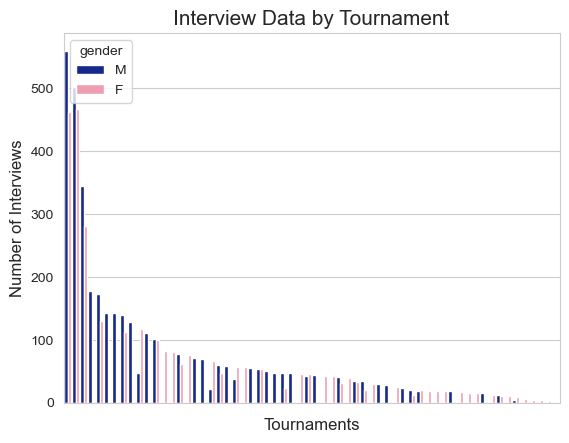

In [ ]:
tournaments_df = transcripts_df.groupby(by=['tournament', 'gender'])[['QandA']].count().reset_index()
tournaments_df = tournaments_df.sort_values(by='QandA', ascending=False)

# Tournament Frequencies
g1 = sns.barplot(data=tournaments_df, x='tournament', y='QandA', hue='gender',
                 hue_order=['M', 'F'])
g1.tick_params(bottom=False)
g1.set(xticklabels=[])

# Adding labels and title
plt.xlabel('Tournaments', fontsize=12)
plt.ylabel('Number of Interviews', fontsize=12)
plt.title('Interview Data by Tournament', fontsize = 15)

# Display the plot
plt.show()

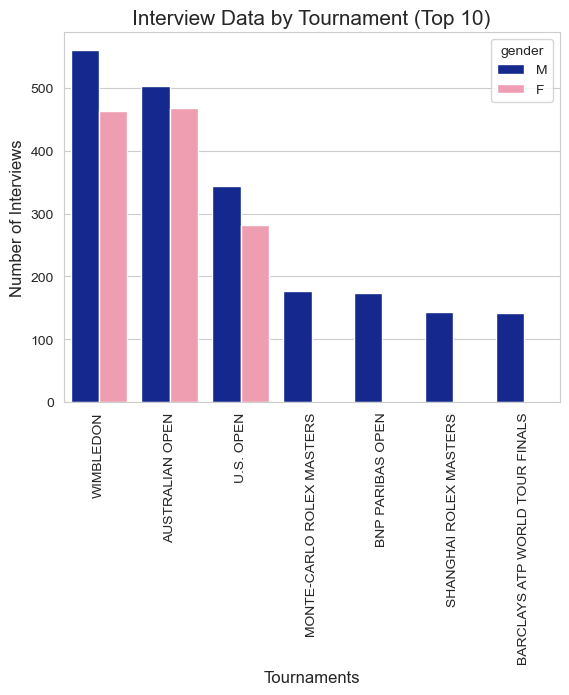

In [ ]:
# The players with the most commentaries (10 most)
tournaments_df = tournaments_df[0:10]

# create custom colors array
colors = ["#001ba1", "#fc90ab"]
# set custom color palette
sns.set_palette(sns.color_palette(colors))

g1 = sns.barplot(data=tournaments_df, x='tournament', y='QandA',
                 hue='gender', hue_order=['M', 'F'])

# Adding labels and title
plt.xlabel('Tournaments', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Number of Interviews', fontsize=12)
plt.title('Interview Data by Tournament (Top 10)', fontsize = 15)

# Display the plot
plt.show()

### Get answers in terms of gender as two lists of words

In [ ]:
male_transcripts_df = transcripts_df[transcripts_df['gender'] == 'M']
female_transcripts_df = transcripts_df[transcripts_df['gender'] == 'F']

male_answers = []
for interview in male_transcripts_df['QandA'].to_list():
  for qna in interview:
    male_answers.append(qna[1])

female_answers = []
for interview in female_transcripts_df['QandA'].to_list():
  for qna in interview:
    female_answers.append(qna[1])

split_words = [words.split() for words in male_answers]
male_answers_words = [word for words in split_words for word in words]

split_words = [words.split() for words in female_answers]
female_answers_words = [word for words in split_words for word in words]

male_answers_text = ' '.join(male_answers_words)
female_answers_text = ' '.join(female_answers_words)
all_answers_text = male_answers_text + ' ' + female_answers_text

### Interview Answers Word Clouds by Gender

-------------------------------------------------------------------
Male Frequency Mean: 113.47878275570584
Female Frequency Mean: 93.20889261744966
Male Frequency STD: 1036.199686862758
Female Frequency STD: 825.5476758931608
-------------------------------------------------------------------
Male Word Count: 241453
Female Word Count: 241453
-------------------------------------------------------------------


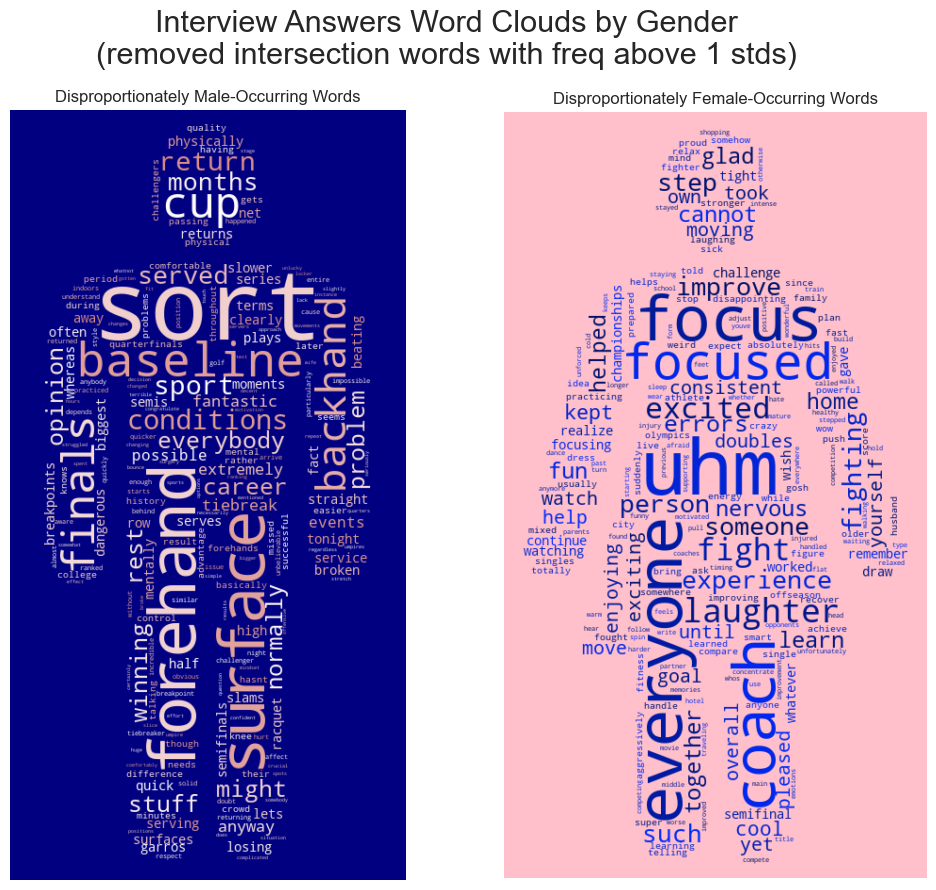

In [ ]:
ans_elements_1std, ans_counters_1std, ans_diff_lists_1std = \
get_diff_words(male_answers_words, female_answers_words, remove_words, 1, 'Interview Answers')

-------------------------------------------------------------------
Male Frequency Mean: 113.47878275570584
Female Frequency Mean: 93.20889261744966
Male Frequency STD: 1036.199686862758
Female Frequency STD: 825.5476758931608
-------------------------------------------------------------------
Male Word Count: 70178
Female Word Count: 70178
-------------------------------------------------------------------


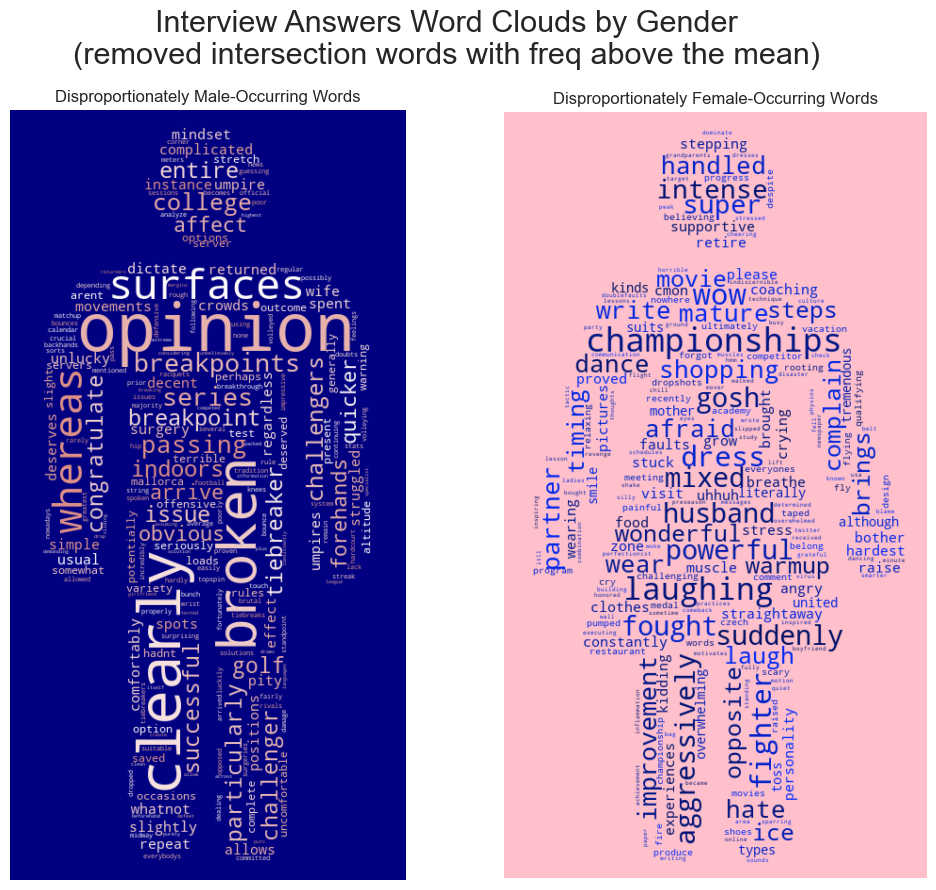

In [ ]:
ans_elements_0std, ans_counters_0std, ans_diff_lists_0std = \
get_diff_words(male_answers_words, female_answers_words, remove_words, 0, 'Interview Answers')

-------------------------------------------------------------------
Male Frequency Mean: 113.47878275570584
Female Frequency Mean: 93.20889261744966
Male Frequency STD: 1036.199686862758
Female Frequency STD: 825.5476758931608
-------------------------------------------------------------------
Male Word Count: 4011
Female Word Count: 4011
-------------------------------------------------------------------


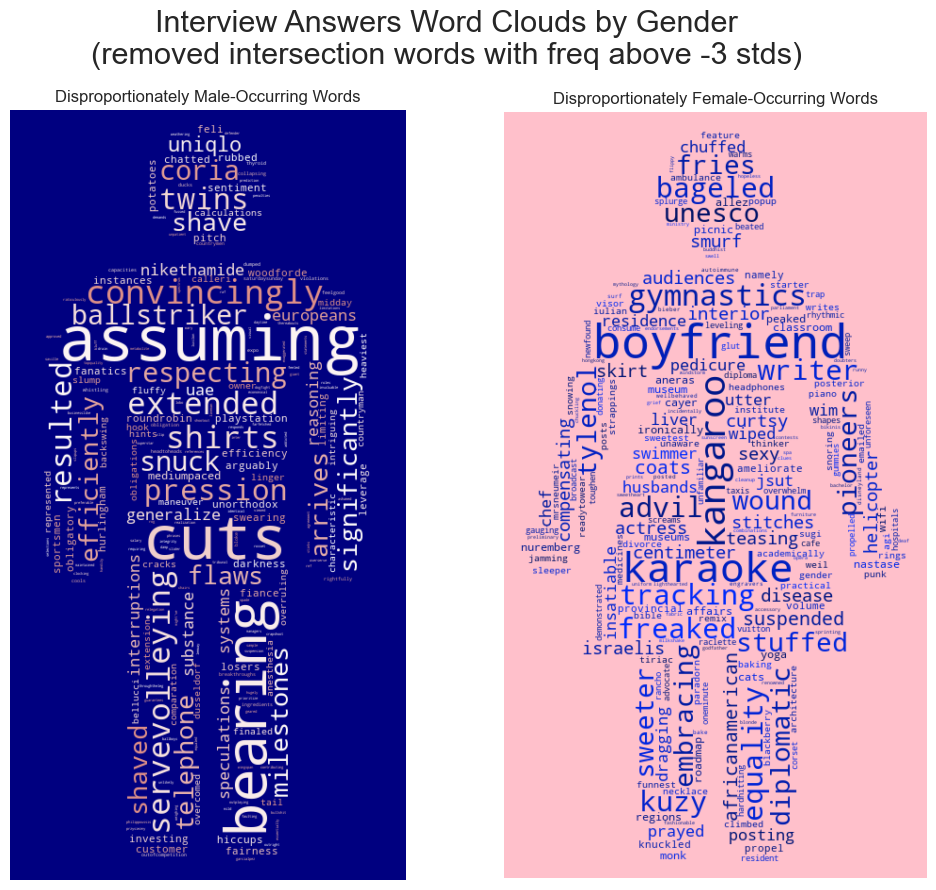

In [ ]:
ans_elements_neg_3std, ans_counters_neg_3std, ans_diff_lists_neg_3std = \
get_diff_words(male_answers_words, female_answers_words, remove_words, -3, 'Interview Answers')

### Interview Answers Word Characteristic Scores by Gender

-------------------------------------------------------------------
Male Percentage of Words Included: 0.69
-------------------------------------------------------------------
Female Percentage of Words Included: 0.72
-------------------------------------------------------------------


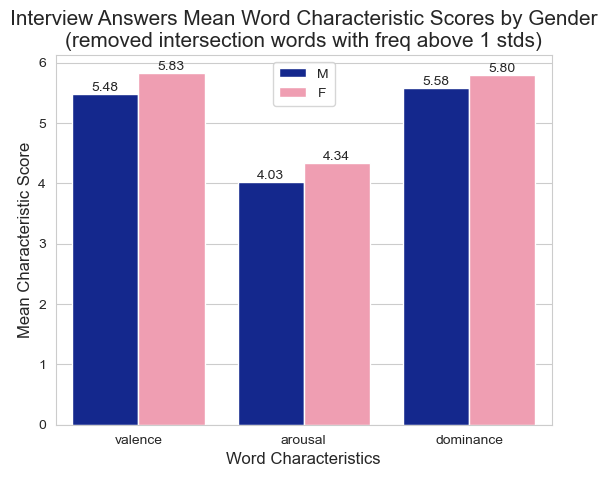

In [ ]:
# after removing the intersection of words appearing more than one standard
#    deviation from the mean in both the men's and women's commentary, we take
#    the mean word characteristic score of the difference in counts to see how
#    words more commonly used to describe men deviate from those more commonly
#    used to describe women.
male_triple, female_triple = get_avg_vad(male_answers_words, female_answers_words, remove_words,
                                         1, 'Interview Answers')

-------------------------------------------------------------------
Male Percentage of Words Included: 0.71
-------------------------------------------------------------------
Female Percentage of Words Included: 0.72
-------------------------------------------------------------------


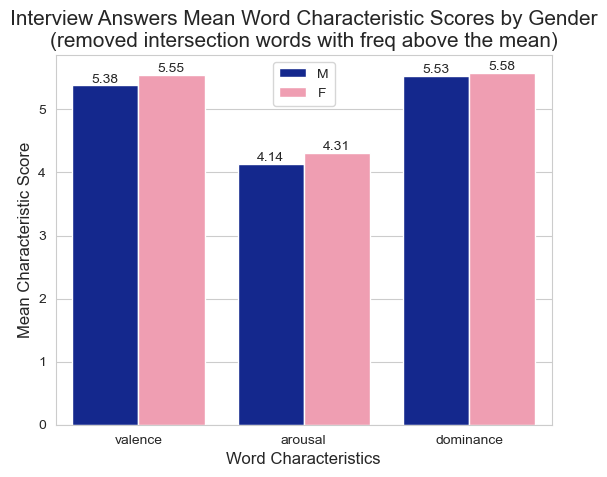

In [ ]:
male_triple, female_triple = get_avg_vad(male_answers_words, female_answers_words, remove_words,
                                         0, 'Interview Answers')

-------------------------------------------------------------------
Male Percentage of Words Included: 0.56
-------------------------------------------------------------------
Female Percentage of Words Included: 0.53
-------------------------------------------------------------------


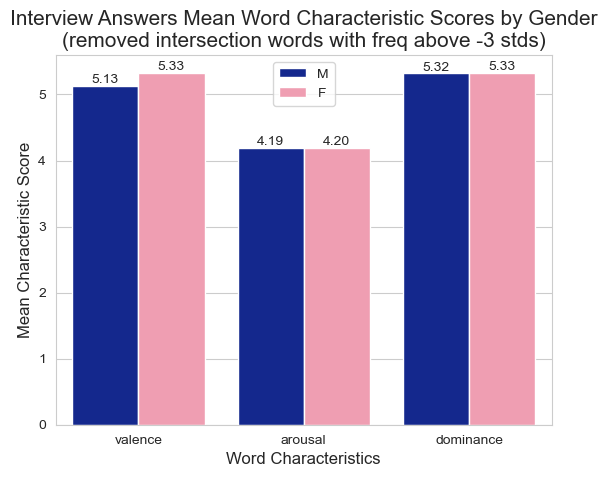

In [ ]:
male_triple, female_triple = get_avg_vad(male_answers_words, female_answers_words, remove_words,
                                         -3, 'Interview Answers')

## Establishing Baselines

### Simple Baseline: Similar top words for male & female tennis players.

Our simple baseline will be a similarity score between the top words for male & female tennis players. To calculate this, we will extract the 30 most common words for both groups and then compare the number of those top 30 words that are related to tennis. This is a similar simple baseline to the one established early in the paper we aim to recreate.

In [ ]:
import re
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
import nltk

# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kylesullivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def get_top_30_sorted_tuples(diff_list):
    # Sort the list of tuples in descending order based on the second element (count)
    sorted_list = sorted(diff_list, key=lambda x: x[1], reverse=True)

    # Return the first 30 elements
    top_30 = sorted_list[:30]

    return top_30

Use chatGPT to first develop a list of tennis-related words. Then, manually add to this list through research from a dictionary etc. The Paper 0 methodology involved actually using the commentary data to determine tennis-related words. In this simple baseline, we will use this list as our determinant of tennis-related words.

ChatGPT prompt:

```
# You are a tennis commentator for the world's most elite athletes.
#We are building a language model to understand tennis commentary better.
#Give me a list of all the words related to tennis that we should consider
#when building a model to detect tennis-related words in commentary and tennis player post-match, pre-match interviews.
```



In [ ]:
tennis_related_words = [
    # Player-Specific Terms
    "player", "singles", "doubles", "opponent", "contender", "challenger", "world", "no", "1", "secures", "hands", "mistakes", "fault", "faults"

    # Match and Game Terms
    "match", "game", "set", "point", "tiebreak", "break", "serve", "volley", "rally", "net", "baseline", "advantage", "deuce", "game", "set", "match", "breaks", "hitting"

    # Tournament and Event Terms
    "grand", "slam", "atp", "wta", "major", "championship", "slam", "masters", "davis", "cup", "fed", "finals", "qualifier", "wildcard",

    # Court and Surface Terms
    "court", "surface", "clay", "grass", "hardcourt", "indoor", "outdoor", "plexicushion", "decoturf", "lands", "sends"

    # Skill and Technique Terms
    "forehand", "forehands", "backhand", "serve", "serving", "volley", "slice", "topspin", "drop", "lob", "smash", "approach", "passing", "spin", "power", "lands", "smash"

    # Equipment and Gear Terms
    "racket", "strings", "grip", "tennis", "ball", "racquet", "bag", "court", "shoes", "apparel", "gear", "kit",

    # Officials and Rules Terms
    "umpire", "chair", "umpire", "line", "judge", "hawk-eye", "challenge", "code", "violation", "let", "net", "cord", "foot", "fault", "double", "fault",

    # Ranking and Seeding Terms
    "ranking", "seed", "world", "number", "one", "top", "seed", "wildcard", "challenger", "qualifier", "round-robin", "concedes"

    # Performance and Strategy Terms
    "ace", "double", "fault", "strategy", "tactics", "mental", "toughness", "fitness", "endurance", "stamina", "speed", "precision", "decider",

    # Achievements and Records Terms
    "grand", "slam", "title", "career", "slam", "golden", "slam", "record", "milestone", "hall", "fame", "winning", "streak", "crowd",

    # Interview and Commentary Terms
    "interview", "commentator", "recap", "prediction", "post-match", "pre-match"
]

# Test print to verify the list
print(tennis_related_words)


['player', 'singles', 'doubles', 'opponent', 'contender', 'challenger', 'world', 'no', '1', 'secures', 'hands', 'mistakes', 'fault', 'faultsmatch', 'game', 'set', 'point', 'tiebreak', 'break', 'serve', 'volley', 'rally', 'net', 'baseline', 'advantage', 'deuce', 'game', 'set', 'match', 'breaks', 'hittinggrand', 'slam', 'atp', 'wta', 'major', 'championship', 'slam', 'masters', 'davis', 'cup', 'fed', 'finals', 'qualifier', 'wildcard', 'court', 'surface', 'clay', 'grass', 'hardcourt', 'indoor', 'outdoor', 'plexicushion', 'decoturf', 'lands', 'sendsforehand', 'forehands', 'backhand', 'serve', 'serving', 'volley', 'slice', 'topspin', 'drop', 'lob', 'smash', 'approach', 'passing', 'spin', 'power', 'lands', 'smashracket', 'strings', 'grip', 'tennis', 'ball', 'racquet', 'bag', 'court', 'shoes', 'apparel', 'gear', 'kit', 'umpire', 'chair', 'umpire', 'line', 'judge', 'hawk-eye', 'challenge', 'code', 'violation', 'let', 'net', 'cord', 'foot', 'fault', 'double', 'fault', 'ranking', 'seed', 'world',

In [ ]:
top_30_female = get_top_30_sorted_tuples(comm_diff_lists_1std[1].most_common())

In [ ]:
top_30_male = get_top_30_sorted_tuples(comm_diff_lists_1std[0].most_common())

In [ ]:
def calculate_tennis_simple_percentage(diff_list, tennis_related_words):
    # Convert tennis_related_words to a set for faster membership testing
    tennis_related_set = set(tennis_related_words)

    # Calculate the total number of words in diff_list
    total_words = sum(count for _, count in diff_list)

    # Calculate the number of tennis-related words in diff_list
    tennis_related_count = sum(count for word, count in diff_list if word.lower() in tennis_related_set)

    # Calculate the percentage of tennis-related words
    percentage_tennis_related = (tennis_related_count / total_words) * 100 if total_words > 0 else 0

    return percentage_tennis_related

In [ ]:
male_question_perc_tennis_top30 = calculate_tennis_simple_percentage(top_30_male, tennis_related_words)
male_question_perc_tennis_top30

33.06962025316456

In [ ]:
female_question_perc_tennis_top_30 = calculate_tennis_simple_percentage(top_30_female, tennis_related_words)
female_question_perc_tennis_top_30

21.750663129973475

This serves as a simple baseline. We see that men have more words than women that are directly tennis related when looking at the top 30 ngrams for questions asked to both women and men.

### Complex Baseline: BERT classification

This baseline is the baseline ultimately used by Paper 0; it is a calculation of perplexity where low perplexity for a question indicates a lower bias.

# Language Models

## Tokenize Commentary Data

## Bigrams

In [ ]:
# all commentary tokens
tok_all_commentary = [word_tokenize(sent) for sent in sent_tokenize(all_commentary_text.lower())]

# get all male commentary tokens
tok_male_commentary = [word_tokenize(sent) for sent in sent_tokenize(male_commentary_text.lower())]

# get all female commentary tokens
tok_female_commentary = [word_tokenize(sent) for sent in sent_tokenize(female_commentary_text.lower())]

# # male questions
# male_q_df = questions_df[questions_df['gender'] == 'M']
# male_q_df = male_q_df.explode(column='questions').reset_index().drop(columns=['index'])
# male_q_df = male_q_df.rename(columns={'questions':'text'})
#
# # get all male question tokens
# male_q_text = male_q_df['text'].to_list()
# tok_male_q = [word_tokenize(q.lower()) for q in sent_tokenize(' '.join(male_q_text))]
#
# # get top 10 ranked male question tokens
# male_t10_q_df = male_q_df[male_q_df['ranking'] <= 10]
# male_t10_q_text = male_t10_q_df['text'].to_list()
# tok_male_t10_q = [word_tokenize(q.lower()) for q in sent_tokenize(' '.join(male_t10_q_text))]
#
# # get lower ranked male question tokens
# male_low_rank_q_df = male_q_df[male_q_df['ranking'] > 10]
# male_low_rank_q_text = male_low_rank_q_df['text'].to_list()
# tok_male_low_rank_q = [word_tokenize(q.lower()) for q in sent_tokenize(' '.join(male_low_rank_q_text))]
#
# # female questions
# female_q_df = questions_df[questions_df['gender'] == 'F']
# female_q_df = female_q_df.explode(column='questions').reset_index().drop(columns=['index'])
# female_q_df = female_q_df.rename(columns={'questions':'text'})
#
# # get all female question tokens
# female_q_text = female_q_df['text'].to_list()
# tok_female_q = [word_tokenize(q.lower()) for q in sent_tokenize(' '.join(female_q_text))]
#
# # get top 10 ranked female question tokens
# female_t10_q_df = female_q_df[female_q_df['ranking'] <= 10]
# female_t10_q_text = female_t10_q_df['text'].to_list()
# tok_female_t10_q = [word_tokenize(q.lower()) for q in sent_tokenize(' '.join(female_t10_q_text))]
#
# # get lower ranked female question tokens
# female_low_rank_q_df = female_q_df[female_q_df['ranking'] > 10]
# female_low_rank_q_text = female_low_rank_q_df['text'].to_list()
# tok_female_low_rank_q = [word_tokenize(q.lower()) for q in sent_tokenize(' '.join(female_low_rank_q_text))]

In [ ]:
# # all answers (this cell takes about an hour to run, but I saved the results and we imported them at the start).

# tok_all_answers_text = [word_tokenize(word) for word in sent_tokenize(all_answers_text)]
# tok_all_text = tok_all_answers_text + tok_all_commentary_text + tok_all_questions_text

# # save all tokenized text to file (so that you don't have to run that long one again)
# pd.DataFrame(tok_all_text).to_csv("tok_all_text.csv",index=False)

#### Construct Bigrams

Get bigrams for questions, where all questions are concatenated

In [ ]:
# bigrams_all_commentary = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_all_commentary] for gram in sent]
# bigrams_male_commentary = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_male_commentary] for gram in sent]
# bigrams_female_commentary = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_female_commentary] for gram in sent]
#
# bigrams_male_q = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_male_q] for gram in sent]
# bigrams_female_q = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_female_q] for gram in sent]
#
# bigrams_male_t10_q = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_male_t10_q] for gram in sent]
# bigrams_male_low_rank_q = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_male_low_rank_q] for gram in sent]
#
# bigrams_female_t10_q = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_female_t10_q] for gram in sent]
# bigrams_female_low_rank_q = [gram for sent in [list(bigrams(pad_both_ends(sent, n=2))) for sent in tok_female_low_rank_q] for gram in sent]

Get bigrams for questions, where each question is a list index

In [ ]:
q_lst = questions_df_cleaned['questions'].values.tolist()
bigram_q_lst = [[lst for sublst in [list(bigrams(pad_both_ends(word_tokenize(sent), n=2))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in q_lst]

bigram_q_lst_cleaned = []
grams = bigram_q_lst
for gram in grams:
    temp = []
    length = len(gram) - 1
    for index, tup in enumerate(gram):
        if gram[index][1] == '</s>':
            pass
        elif index < length and gram[index+1][1] == '</s>':
            temp.append(tuple([gram[index][0], '</s>']))
        else:
            temp.append(tuple([gram[index][0], gram[index][1]]))
    bigram_q_lst_cleaned.append(temp)

questions_df_cleaned['bigram_questions'] = bigram_q_lst_cleaned

In [ ]:
# male_q_lst = male_q_df['text'].values.tolist()
# bigram_male_q_lst = [[lst for sublst in [list(bigrams(pad_both_ends(word_tokenize(sent), n=2))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in male_q_lst]
#
# female_q_lst = female_q_df['text'].values.tolist()
# bigram_female_q_lst = [[lst for sublst in [list(bigrams(pad_both_ends(word_tokenize(sent), n=2))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in female_q_lst]

In [ ]:
# bigram_male_t10_q_lst = [[lst for sublst in [list(bigrams(pad_both_ends(word_tokenize(sent), n=2))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in male_t10_q_text]
# bigram_male_low_rank_q_lst = [[lst for sublst in [list(bigrams(pad_both_ends(word_tokenize(sent), n=2))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in male_low_rank_q_text]
#
# bigram_female_t10_q_lst = [[lst for sublst in [list(bigrams(pad_both_ends(word_tokenize(sent), n=2))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in female_t10_q_text]
# bigram_female_low_rank_q_lst = [[lst for sublst in [list(bigrams(pad_both_ends(word_tokenize(sent), n=2))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in female_low_rank_q_text]

In [ ]:
tok_all_commentary_cleaned = [sent[0:-1] for sent in tok_all_commentary]
tok_male_commentary_cleaned = [sent[0:-1] for sent in tok_male_commentary]
tok_female_commentary_cleaned = [sent[0:-1] for sent in tok_female_commentary]

### Bi-gram Model Trained on All Commentary Data

#### Construct Models

In [ ]:
bigram_q_lst_cleaned

[[('<s>', 'that'),
  ('that', 'last'),
  ('last', 'set'),
  ('set', 'seemed'),
  ('seemed', 'like'),
  ('like', 'a'),
  ('a', 'faultless'),
  ('faultless', 'performance'),
  ('performance', '</s>'),
  ('<s>', 'is'),
  ('is', 'that'),
  ('that', 'the'),
  ('the', 'way'),
  ('way', 'you'),
  ('you', 'saw'),
  ('saw', 'it'),
  ('it', '</s>')],
 [('<s>', 'did'),
  ('did', 'playing'),
  ('playing', 'the'),
  ('the', 'semifinal'),
  ('semifinal', ','),
  (',', 'finishing'),
  ('finishing', 'that'),
  ('that', 'off'),
  ('off', 'first'),
  ('first', ','),
  (',', 'help'),
  ('help', 'you'),
  ('you', 'going'),
  ('going', 'into'),
  ('into', 'the'),
  ('the', 'second'),
  ('second', 'match'),
  ('match', 'in'),
  ('in', 'the'),
  ('the', 'afternoon'),
  ('afternoon', '</s>')],
 [('<s>', 'is'),
  ('is', 'that'),
  ('that', 'difficult'),
  ('difficult', 'mentally'),
  ('mentally', 'as'),
  ('as', 'much'),
  ('much', 'as'),
  ('as', 'physically'),
  ('physically', 'to'),
  ('to', 'switch'),
  ('

#### Bigram Mann-Whitney U Rank Test

##### All Players

In [ ]:
questions_df_cleaned = pd.read_csv('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Code/q_df.csv')
questions_df_cleaned

Unnamed: 0             player gender  result  \
0               0        andy murray      M       1   
1               0        andy murray      M       1   
2               0        andy murray      M       1   
3               0        andy murray      M       1   
4               0        andy murray      M       1   
...           ...                ...    ...     ...   
81928        6466  victoria azarenka      F       1   
81929        6466  victoria azarenka      F       1   
81930        6466  victoria azarenka      F       1   
81931        6466  victoria azarenka      F       1   
81932        6466  victoria azarenka      F       1   

                                               questions  ranking  \
0      That last set seemed like a faultless performa...      3.0   
1      Did playing the semifinal, finishing that off ...      3.0   
2      Is that difficult mentally as much as physical...      3.0   
3      You said on TV I think you said you felt bette...      3.0   
4      The last time that you won this tournament you...      3.0   
...                                                  ...      ...   
81928  Tennis is sometimes described as a profession,...      8.0   
81929  Last year's champion is really into art. Who a...      8.0   
81930  You touched on your support of Argentina. How ...      8.0   
81931     Do you think Wimbledon does that to an extent?      8.0   
81932  What goes through your mind when you watch Messi?      8.0   

                                        bigram_questions  \
0      [('<s>', 'that'), ('that', 'last'), ('last', '...   
1      [('<s>', 'did'), ('did', 'playing'), ('playing...   
2      [('<s>', 'is'), ('is', 'that'), ('that', 'diff...   
3      [('<s>', 'you'), ('you', 'said'), ('said', 'on...   
4      [('<s>', 'the'), ('the', 'last'), ('last', 'ti...   
...                                                  ...   
81928  [('<s>', 'tennis'), ('tennis', 'is'), ('is', '...   
81929  [('<s>', 'last'), ('last', 'year'), ('year', "...   
81930  [('<s>', 'you'), ('you', 'touched'), ('touched...   
81931  [('<s>', 'do'), ('do', 'you'), ('you', 'think'...   
81932  [('<s>', 'what'), ('what', 'goes'), ('goes', '...   

       adi_bigram_perplexity  lap_bigram_perplexity  sb_bigram_perplexity  \
0                 834.621616             982.597397            657.978210   
1                 339.545920             697.892007            214.664696   
2                 348.509815             607.945086            283.513724   
3                 622.622800            1265.064041            515.982747   
4                 313.505197             709.686402            256.044067   
...                      ...                    ...                   ...   
81928             214.605174             605.931048            159.598033   
81929             147.161370             669.610697            102.707659   
81930             199.928943             454.441263            164.995255   
81931            1510.605773            1983.842022           1089.078060   
81932            1887.707216            1333.391479           1532.818714   

       ...  sb_trigram_perplexity  kni_trigram_perplexity  \
0      ...             466.777035             1246.481854   
1      ...             407.549804             1507.138443   
2      ...             217.397702              434.769204   
3      ...             976.788094             2375.957457   
4      ...             189.922261              304.966523   
...    ...                    ...                     ...   
81928  ...             187.566341              457.877750   
81929  ...              82.089927              199.003488   
81930  ...             175.976660              412.267966   
81931  ...            1272.192910             3224.944131   
81932  ...            1764.786365             3746.894403   

       adi_m_trigram_perplexity  lap_m_trigram_perplexity  \
0                    394.459984               1342.143033   
1               

In [ ]:
print('LAP:')
lap_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['lap_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['lap_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['adi_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['adi_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['sb_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['sb_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['kni_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['kni_bigram_perplexity'])
print('----------------------------------------------------------------------')

##### Top 10

In [ ]:
print('LAP:')
lap_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['lap_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['lap_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['adi_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['adi_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['sb_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['sb_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['kni_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['kni_bigram_perplexity'])
print('----------------------------------------------------------------------')

##### Not Top 10

In [ ]:
print('LAP:')
lap_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['lap_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['lap_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['adi_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['adi_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['sb_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['sb_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['kni_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['kni_bigram_perplexity'])
print('----------------------------------------------------------------------')

### Bi-gram Model Trained on Male Commentary Data

#### Construct Models

In [ ]:
vocab = Vocabulary(padded_everygram_pipeline(2, tok_male_commentary_cleaned)[1], unk_cutoff=2)
adi_m_model2 = AbsoluteDiscountingInterpolated(2, vocabulary = vocab)
adi_m_model2.fit(padded_everygram_pipeline(2, tok_male_commentary_cleaned)[0], vocab)
print(len(adi_m_model2.vocab))

vocab = Vocabulary(padded_everygram_pipeline(2, tok_male_commentary_cleaned)[1], unk_cutoff=2)
lap_m_model2 = Laplace(2, vocabulary = vocab)
lap_m_model2.fit(padded_everygram_pipeline(2, tok_male_commentary_cleaned)[0], vocab)
print(len(lap_m_model2.vocab))

vocab = Vocabulary(padded_everygram_pipeline(2, tok_male_commentary_cleaned)[1], unk_cutoff=2)
kni_m_model2 = KneserNeyInterpolated(2, vocabulary = vocab)
kni_m_model2.fit(padded_everygram_pipeline(2, tok_male_commentary_cleaned)[0], vocab)
print(len(kni_m_model2.vocab))

vocab = Vocabulary(padded_everygram_pipeline(2, tok_male_commentary_cleaned)[1], unk_cutoff=2)
sb_m_model2 = StupidBackoff(order=2, vocabulary = vocab)
sb_m_model2.fit(padded_everygram_pipeline(2, tok_male_commentary_cleaned)[0], vocab)
print(len(sb_m_model2.vocab))

#### Question Perplexities

In [ ]:
questions_df_cleaned['adi_m_bigram_perplexity'] = [adi_m_model2.perplexity(q) for q in bigram_q_lst_cleaned]
questions_df_cleaned['lap_m_bigram_perplexity'] = [lap_m_model2.perplexity(q) for q in bigram_q_lst_cleaned]
questions_df_cleaned['sb_m_bigram_perplexity'] = [sb_m_model2.perplexity(q) for q in bigram_q_lst_cleaned]
questions_df_cleaned['kni_m_bigram_perplexity'] = [kni_m_model2.perplexity(q) for q in bigram_q_lst_cleaned]

questions_df_cleaned.to_csv('q_df.csv')

#### Bigram Mann-Whitney U Rank Test

##### All Players

In [ ]:
print('LAP:')
lap_m_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['lap_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['lap_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_m_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['adi_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['adi_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_m_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['sb_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['sb_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_m_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['kni_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['kni_m_bigram_perplexity'])
print('----------------------------------------------------------------------')

##### Top 10

In [ ]:
print('LAP:')
lap_m_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['lap_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['lap_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_m_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['adi_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['adi_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_m_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['sb_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['sb_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_m_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['kni_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['kni_m_bigram_perplexity'])
print('----------------------------------------------------------------------')

##### Not Top 10

In [ ]:
print('LAP:')
lap_m_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['lap_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['lap_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_m_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['adi_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['adi_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_m_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['sb_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['sb_m_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_m_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['kni_m_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['kni_m_bigram_perplexity'])
print('----------------------------------------------------------------------')

### Bi-gram Model Trained on Female Commentary Data

#### Construct Models

In [ ]:
vocab = Vocabulary(padded_everygram_pipeline(2, tok_female_commentary_cleaned)[1], unk_cutoff=2)
adi_f_model2 = AbsoluteDiscountingInterpolated(2, vocabulary = vocab)
adi_f_model2.fit(padded_everygram_pipeline(2, tok_female_commentary_cleaned)[0], vocab)
print(len(adi_f_model2.vocab))

vocab = Vocabulary(padded_everygram_pipeline(2, tok_female_commentary_cleaned)[1], unk_cutoff=2)
lap_f_model2 = Laplace(2, vocabulary = vocab)
lap_f_model2.fit(padded_everygram_pipeline(2, tok_female_commentary_cleaned)[0], vocab)
print(len(lap_f_model2.vocab))

vocab = Vocabulary(padded_everygram_pipeline(2, tok_female_commentary_cleaned)[1], unk_cutoff=2)
kni_f_model2 = KneserNeyInterpolated(2, vocabulary = vocab)
kni_f_model2.fit(padded_everygram_pipeline(2, tok_female_commentary_cleaned)[0], vocab)
print(len(kni_f_model2.vocab))

vocab = Vocabulary(padded_everygram_pipeline(2, tok_female_commentary_cleaned)[1], unk_cutoff=2)
sb_f_model2 = StupidBackoff(order=2, vocabulary = vocab)
sb_f_model2.fit(padded_everygram_pipeline(2, tok_female_commentary_cleaned)[0], vocab)
print(len(sb_f_model2.vocab))

#### Question Perplexities

In [ ]:
questions_df_cleaned['adi_f_bigram_perplexity'] = [adi_f_model2.perplexity(q) for q in bigram_q_lst_cleaned]
questions_df_cleaned['lap_f_bigram_perplexity'] = [lap_f_model2.perplexity(q) for q in bigram_q_lst_cleaned]
questions_df_cleaned['sb_f_bigram_perplexity'] = [sb_f_model2.perplexity(q) for q in bigram_q_lst_cleaned]
questions_df_cleaned['kni_f_bigram_perplexity'] = [kni_f_model2.perplexity(q) for q in bigram_q_lst_cleaned]

questions_df_cleaned.to_csv('q_df.csv')

#### Bigram Mann-Whitney U Rank Test

##### All Players

In [ ]:
print('LAP:')
lap_f_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['lap_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['lap_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_f_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['adi_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['adi_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_f_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['sb_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['sb_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_f_bigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['kni_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['kni_f_bigram_perplexity'])
print('----------------------------------------------------------------------')

##### Top 10

In [ ]:
print('LAP:')
lap_f_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['lap_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['lap_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_f_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['adi_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['adi_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_f_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['sb_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['sb_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_f_bigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['kni_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['kni_f_bigram_perplexity'])
print('----------------------------------------------------------------------')

##### Not Top 10

In [ ]:
print('LAP:')
lap_f_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['lap_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['lap_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_f_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['adi_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['adi_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_f_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['sb_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['sb_f_bigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_f_bigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['kni_f_bigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['kni_f_bigram_perplexity'])
print('----------------------------------------------------------------------')

## Trigrams

#### Construct Trigrams

Get trigrams for questions, where all questions are concatenated

In [ ]:
# trigrams_all_commentary = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_all_commentary] for gram in sent]
# trigrams_male_commentary = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_male_commentary] for gram in sent]
# trigrams_female_commentary = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_female_commentary] for gram in sent]
#
# trigrams_male_q = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_male_q] for gram in sent]
# trigrams_female_q = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_female_q] for gram in sent]
#
# trigrams_male_t10_q = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_male_t10_q] for gram in sent]
# trigrams_male_low_rank_q = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_male_low_rank_q] for gram in sent]
#
# trigrams_female_t10_q = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_female_t10_q] for gram in sent]
# trigrams_female_low_rank_q = [gram for sent in [list(trigrams(pad_both_ends(sent, n=3))) for sent in tok_female_low_rank_q] for gram in sent]

Get trigrams for questions, where each question is a list index

In [ ]:
q_lst = questions_df_cleaned['questions'].values.tolist()
trigram_q_lst = [[lst for sublst in [list(trigrams(pad_both_ends(word_tokenize(sent), n=3))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in q_lst]

trigram_q_lst_cleaned = []
grams = trigram_q_lst
for gram in grams:
    temp = []
    length = len(gram) - 1
    for index, tup in enumerate(gram):
        if gram[index][1] == '</s>':
            pass
        elif index < length and gram[index+1][1] == '</s>':
            temp.append(tuple([gram[index][0], '</s>', '</s>']))
        elif index < length and gram[index+1][2] == '</s>':
            temp.append(tuple([gram[index][0], gram[index][1], '</s>']))
        else:
            temp.append(tuple([gram[index][0], gram[index][1], gram[index][2]]))
    trigram_q_lst_cleaned.append(temp)

questions_df_cleaned['trigram_questions'] = trigram_q_lst_cleaned

In [ ]:
# male_q_lst = male_q_df['text'].values.tolist()
# trigram_male_q_lst = [[lst for sublst in [list(trigrams(pad_both_ends(word_tokenize(sent), n=3))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in male_q_lst]
#
# female_q_lst = female_q_df['text'].values.tolist()
# trigram_female_q_lst = [[lst for sublst in [list(trigrams(pad_both_ends(word_tokenize(sent), n=3))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in female_q_lst]

In [ ]:
# trigram_male_t10_q_lst = [[lst for sublst in [list(trigrams(pad_both_ends(word_tokenize(sent), n=3))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in male_t10_q_text]
# trigram_male_low_rank_q_lst = [[lst for sublst in [list(trigrams(pad_both_ends(word_tokenize(sent), n=3))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in male_low_rank_q_text]
#
# trigram_female_t10_q_lst = [[lst for sublst in [list(trigrams(pad_both_ends(word_tokenize(sent), n=3))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in female_t10_q_text]
# trigram_female_low_rank_q_lst = [[lst for sublst in [list(trigrams(pad_both_ends(word_tokenize(sent), n=3))) for sent in sent_tokenize(question.lower())] for lst in sublst] for question in female_low_rank_q_text]

### Tri-gram Model Trained on All Commentary Data

#### Construct Models

In [ ]:
vocab = Vocabulary(padded_everygram_pipeline(3, tok_all_commentary_cleaned)[1], unk_cutoff=2)
adi_model3 = AbsoluteDiscountingInterpolated(3, vocabulary = vocab)
adi_model3.fit(padded_everygram_pipeline(3, tok_all_commentary_cleaned)[0], vocab)
print(len(adi_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_all_commentary_cleaned)[1], unk_cutoff=2)
lap_model3 = Laplace(3, vocabulary = vocab)
lap_model3.fit(padded_everygram_pipeline(3, tok_all_commentary_cleaned)[0], vocab)
print(len(lap_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_all_commentary_cleaned)[1], unk_cutoff=2)
kni_model3 = KneserNeyInterpolated(3, vocabulary = vocab)
kni_model3.fit(padded_everygram_pipeline(3, tok_all_commentary_cleaned)[0], vocab)
print(len(kni_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_all_commentary_cleaned)[1], unk_cutoff=2)
sb_model3 = StupidBackoff(order=3, vocabulary = vocab)
sb_model3.fit(padded_everygram_pipeline(3, tok_all_commentary_cleaned)[0], vocab)
print(len(sb_model3.vocab))

#### Question Perplexities

In [ ]:
questions_df_cleaned['adi_trigram_perplexity'] = [adi_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['lap_trigram_perplexity'] = [lap_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['sb_trigram_perplexity'] = [sb_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['kni_trigram_perplexity'] = [kni_model3.perplexity(q) for q in trigram_q_lst_cleaned]

questions_df_cleaned.to_csv('q_df.csv')

#### Trigram Mann-Whitney U Rank Test

##### All Players

In [ ]:
print('LAP:')
lap_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['lap_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['lap_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['adi_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['adi_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['sb_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['sb_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['kni_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['kni_trigram_perplexity'])
print('----------------------------------------------------------------------')

##### Top 10

In [ ]:
print('LAP:')
lap_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['lap_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['lap_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['adi_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['adi_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['sb_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['sb_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['kni_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['kni_trigram_perplexity'])
print('----------------------------------------------------------------------')

##### Not Top 10

In [ ]:
print('LAP:')
lap_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['lap_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['lap_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['adi_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['adi_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['sb_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['sb_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['kni_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['kni_trigram_perplexity'])
print('----------------------------------------------------------------------')

### Tri-gram Model Trained on Male Commentary Data

#### Construct Models

In [ ]:
vocab = Vocabulary(padded_everygram_pipeline(3, tok_male_commentary_cleaned)[1], unk_cutoff=2)
adi_m_model3 = AbsoluteDiscountingInterpolated(3, vocabulary = vocab)
adi_m_model3.fit(padded_everygram_pipeline(3, tok_male_commentary_cleaned)[0], vocab)
print(len(adi_m_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_male_commentary_cleaned)[1], unk_cutoff=2)
lap_m_model3 = Laplace(3, vocabulary = vocab)
lap_m_model3.fit(padded_everygram_pipeline(3, tok_male_commentary_cleaned)[0], vocab)
print(len(lap_m_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_male_commentary_cleaned)[1], unk_cutoff=2)
kni_m_model3 = KneserNeyInterpolated(3, vocabulary = vocab)
kni_m_model3.fit(padded_everygram_pipeline(3, tok_male_commentary_cleaned)[0], vocab)
print(len(kni_m_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_male_commentary_cleaned)[1], unk_cutoff=2)
sb_m_model3 = StupidBackoff(order=3, vocabulary = vocab)
sb_m_model3.fit(padded_everygram_pipeline(3, tok_male_commentary_cleaned)[0], vocab)
print(len(sb_m_model3.vocab))

#### Question Perplexities

In [ ]:
questions_df_cleaned['adi_m_trigram_perplexity'] = [adi_m_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['lap_m_trigram_perplexity'] = [lap_m_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['sb_m_trigram_perplexity'] = [sb_m_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['kni_m_trigram_perplexity'] = [kni_m_model3.perplexity(q) for q in trigram_q_lst_cleaned]

questions_df_cleaned.to_csv('q_df.csv')

#### Bigram Mann-Whitney U Rank Test

##### All Players

In [ ]:
print('LAP:')
lap_m_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['lap_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['lap_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_m_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['adi_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['adi_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_m_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['sb_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['sb_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_m_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['kni_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['kni_m_trigram_perplexity'])
print('----------------------------------------------------------------------')

##### Top 10

In [ ]:
print('LAP:')
lap_m_trigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['lap_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['lap_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_m_trigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['adi_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['adi_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_m_trigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['sb_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['sb_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_m_trigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['kni_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['kni_m_trigram_perplexity'])
print('----------------------------------------------------------------------')

##### Not Top 10

In [ ]:
print('LAP:')
lap_m_trigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['lap_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['lap_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_m_trigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['adi_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['adi_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_m_trigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['sb_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['sb_m_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_m_trigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['kni_m_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['kni_m_trigram_perplexity'])
print('----------------------------------------------------------------------')

### Bi-gram Model Trained on Female Commentary Data

#### Construct Models

In [ ]:
vocab = Vocabulary(padded_everygram_pipeline(3, tok_female_commentary_cleaned)[1], unk_cutoff=2)
adi_f_model3 = AbsoluteDiscountingInterpolated(3, vocabulary = vocab)
adi_f_model3.fit(padded_everygram_pipeline(3, tok_female_commentary_cleaned)[0], vocab)
print(len(adi_f_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_female_commentary_cleaned)[1], unk_cutoff=2)
lap_f_model3 = Laplace(3, vocabulary = vocab)
lap_f_model3.fit(padded_everygram_pipeline(3, tok_female_commentary_cleaned)[0], vocab)
print(len(lap_f_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_female_commentary_cleaned)[1], unk_cutoff=2)
kni_f_model3 = KneserNeyInterpolated(3, vocabulary = vocab)
kni_f_model3.fit(padded_everygram_pipeline(3, tok_female_commentary_cleaned)[0], vocab)
print(len(kni_f_model3.vocab))

vocab = Vocabulary(padded_everygram_pipeline(3, tok_female_commentary_cleaned)[1], unk_cutoff=2)
sb_f_model3 = StupidBackoff(order=3, vocabulary = vocab)
sb_f_model3.fit(padded_everygram_pipeline(3, tok_female_commentary_cleaned)[0], vocab)
print(len(sb_f_model3.vocab))

#### Question Perplexities

In [ ]:
questions_df_cleaned['adi_f_trigram_perplexity'] = [adi_f_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['lap_f_trigram_perplexity'] = [lap_f_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['sb_f_trigram_perplexity'] = [sb_f_model3.perplexity(q) for q in trigram_q_lst_cleaned]
questions_df_cleaned['kni_f_trigram_perplexity'] = [kni_f_model3.perplexity(q) for q in trigram_q_lst_cleaned]

questions_df_cleaned.to_csv('q_df.csv')

#### Bigram Mann-Whitney U Rank Test

##### All Players

In [ ]:
print('LAP:')
lap_f_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['lap_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['lap_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_f_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['adi_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['adi_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_f_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['sb_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['sb_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_f_trigram_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M')]['kni_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F')]['kni_f_trigram_perplexity'])
print('----------------------------------------------------------------------')

##### Top 10

In [ ]:
print('LAP:')
lap_f_trigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['lap_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['lap_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_f_trigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['adi_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['adi_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_f_trigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['sb_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['sb_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
adi_f_trigram_t10_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] <= 10)]['kni_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] <= 10)]['kni_f_trigram_perplexity'])
print('----------------------------------------------------------------------')

##### Not Top 10

In [ ]:
print('LAP:')
lap_f_trigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['lap_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['lap_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('ADI:')
adi_f_trigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['adi_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['adi_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('SB:')
sb_f_trigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['sb_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['sb_f_trigram_perplexity'])
print('----------------------------------------------------------------------')
print('KNI:')
kni_f_trigram_low_rank_q_lst_p_val = calc_perp(questions_df_cleaned[(questions_df_cleaned['gender'] == 'M') & (questions_df_cleaned['ranking'] > 10)]['kni_f_trigram_perplexity'], questions_df_cleaned[(questions_df_cleaned['gender'] == 'F') & (questions_df_cleaned['ranking'] > 10)]['kni_f_trigram_perplexity'])
print('----------------------------------------------------------------------')

In [ ]:
lap_bigram_q_lst_p_val, adi_bigram_q_lst_p_val, sb_bigram_q_lst_p_val, kni_bigram_q_lst_p_val

In [ ]:
questions_df_cleaned.sort_values(['adi_bigram_perplexity', 'adi_trigram_perplexity'], ascending=False).head(50)[['player', 'gender', 'result', 'questions', 'adi_bigram_perplexity', 'adi_trigram_perplexity']]

## LSTM Model Trained on All Commentary Data

In [ ]:
try:
  import google.colab
  !nvidia-smi -L
  !pip install datasets
  google.colab.drive.mount('/content/drive/')               # For saving the model.
  #%cd ../content/drive/SaveLocation
except:
  IN_COLAB = False

Set up device GPU (specific to Mac - I think colab uses device = torch.device('gpu'))

In [ ]:
mps_device = torch.device("mps")
mps_device

device(type='mps')

Get male questions (not currently being used)

In [ ]:
male_q_df = questions_df[questions_df['gender'] == 'M']
male_q_df = male_q_df.explode(column='questions').reset_index().drop(columns=['index']).reset_index()
male_q_df = male_q_df.rename(columns={'questions':'text'})
male_q_df

index         player gender  result  \
0          0    Andy Murray      M       1   
1          1    Andy Murray      M       1   
2          2    Andy Murray      M       1   
3          3    Andy Murray      M       1   
4          4    Andy Murray      M       1   
...      ...            ...    ...     ...   
43968  43968     Daniel Cox      M       0   
43969  43969     Daniel Cox      M       0   
43970  43970     Daniel Cox      M       0   
43971  43971  Tomas Berdych      M       1   
43972  43972  Tomas Berdych      M       1   

                                                    text  ranking  
0      That last set seemed like a faultless performa...      3.0  
1      Did playing the semifinal, finishing that off ...      3.0  
2      Is that difficult mentally as much as physical...      3.0  
3      You said on TV I think you said you felt bette...      3.0  
4      The last time that you won this tournament you...      3.0  
...                                                  ...      ...  
43968  You've seen a commitment to Britain and I supp...    214.0  
43969  Dan Evans is the one that's been fairly vocal ...    214.0  
43970  So just to be clear then, if he's not breaking...    214.0  
43971  Not related to this particular game, but have ...      6.0  
43972                 Do you think that that would be...      6.0  

[43973 rows x 6 columns]

Get female questions (not currently being used)

In [ ]:
female_q_df = questions_df[questions_df['gender'] == 'F']
female_q_df = female_q_df.explode(column='questions').reset_index().drop(columns=['index']).reset_index()
female_q_df = female_q_df.rename(columns={'questions':'text'})
female_q_df

index             player gender  result  \
0          0  Karolina Pliskova      F       0   
1          1  Karolina Pliskova      F       0   
2          2  Karolina Pliskova      F       0   
3          3  Karolina Pliskova      F       0   
4          4  Karolina Pliskova      F       0   
...      ...                ...    ...     ...   
37955  37955  Victoria Azarenka      F       1   
37956  37956  Victoria Azarenka      F       1   
37957  37957  Victoria Azarenka      F       1   
37958  37958  Victoria Azarenka      F       1   
37959  37959  Victoria Azarenka      F       1   

                                                    text  ranking  
0      What are the main positives you can draw from ...     12.0  
1      What's next ahead of Wimbledon in terms of wha...     12.0  
2      Grass is a tricky surface and you need to move...     12.0  
3      If I'm not mistaken, you hadn't won backtoback...     12.0  
4      What made it click this year for your grass game?     12.0  
...                                                  ...      ...  
37955  Tennis is sometimes described as a profession,...      8.0  
37956  Last year's champion is really into art. Who a...      8.0  
37957  You touched on your support of Argentina. How ...      8.0  
37958     Do you think Wimbledon does that to an extent?      8.0  
37959  What goes through your mind when you watch Messi?      8.0  

[37960 rows x 6 columns]

### Initialization

Get questions and commentary sentences without end of sentence punctuation (but still using <eso>).
Instead of using male and female separated questions, I've been using all questions together - the goal
is to save the perplexities to the questions directly, and then split on gender and average afterward.

In [ ]:
male_q_lst = questions_df_cleaned[questions_df_cleaned['gender'] == 'M']['questions'].values.tolist()
female_q_lst = questions_df_cleaned[questions_df_cleaned['gender'] == 'F']['questions'].values.tolist()

In [ ]:
c_lstm_tokens = [['<s>']+sentence[0:-1]+['</s>'] for sentence in [word_tokenize(sent) for sent in sent_tokenize(all_commentary_text.lower())]]

q_lstm_tokens = [[word for word_lst in [['<s>']+word_tokenize(sent)[0:-1]+['</s>'] for sent in sent_tokenize(question.lower())] for word in word_lst] for question in q_lst]

In [ ]:
# male_q_lstm_tokens = [[word for word_lst in [word_tokenize(sent)[0:-1]+['<eos>'] for sent in sent_tokenize(question.lower())] for word in word_lst] for question in male_q_lst]
#
# female_q_lstm_tokens = [[word for word_lst in [word_tokenize(sent)[0:-1]+['<eos>'] for sent in sent_tokenize(question.lower())] for word in word_lst] for question in female_q_lst]

Check that the output has no end-of-sentence punctuation, but does include the <eos> tag.

Pad all sentences to have max length across all question/commentary examples (padded with <pad> at end), and put the results in a train, validation, test dataset.

#### Train, Validation, Test Data

In [ ]:
max_seq = 0
for i in c_lstm_tokens:
    if len(i) > max_seq:
        max_seq = len(i)
for i in q_lstm_tokens:
    if len(i) > max_seq:
        max_seq = len(i)

c_unif_len_tok = deepcopy(c_lstm_tokens)
for index, i in enumerate(c_unif_len_tok):
    diff = max_seq - len(i)
    c_unif_len_tok[index] += ['<pad>' for _ in range(diff)]

q_unif_len_tok = deepcopy(q_lstm_tokens)
for index, i in enumerate(q_unif_len_tok):
    diff = max_seq - len(i)
    q_unif_len_tok[index] += ['<pad>' for _ in range(diff)]

train_df = pd.DataFrame({'tokens': c_unif_len_tok})
test_df = pd.DataFrame({'tokens': q_unif_len_tok})

# dataset = ds.dataset(pa.Table.from_pandas(df).to_batches())
tokenized_dataset = Dataset.from_pandas(train_df).train_test_split(test_size=0.2, seed=0)
tokenized_dataset['validation'] = tokenized_dataset['test']
tokenized_dataset.pop('test')

q_dataset = Dataset.from_pandas(test_df)
tokenized_dataset['test'] = q_dataset

tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['tokens'],
        num_rows: 7817
    })
    validation: Dataset({
        features: ['tokens'],
        num_rows: 1955
    })
    test: Dataset({
        features: ['tokens'],
        num_rows: 81933
    })
})

In [ ]:
print(tokenized_dataset['test'][0]['tokens'])

['<s>', 'that', 'last', 'set', 'seemed', 'like', 'a', 'faultless', 'performance', '</s>', '<s>', 'is', 'that', 'the', 'way', 'you', 'saw', 'it', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '

#### Vocabulary

Make vocabulary out of training data, only with examples appearing at least 3 times. Add <unk> to the vocab and set it as the default for out of vocab words (we place <pad> at location 0, so 0's in the tensor will intuitively map to <pad>).

In [ ]:
vocab = torchtext.vocab.build_vocab_from_iterator(tokenized_dataset['train']['tokens'], min_freq=3)
vocab.insert_token('<unk>', 1)            # insert unknown token (<UNK>)
vocab.set_default_index(vocab['<unk>'])   # So that when a token isn't found, it returns the index of the unk token
print(len(vocab))                         # total number words in the vocabulary
print(vocab.get_itos()[:10])              # first 10 tokens converted to strings from tokens

2297
['<pad>', '<unk>', 'the', '</s>', '<s>', 'a', 'to', ',', 'and', 'with']



Make function to convert the examples from WORDS -> INTS, where their embedding can be easily looked up.

In [ ]:
def get_data(dataset, vocab):
    data = []

    # Merge everything into one gigantic document that we wish to model (all the tokens)
    for example in dataset:
        # if the example has tokens (not empty)
        if example['tokens']:
            # convert tokens to indices
            tokens = [vocab[token] for token in example['tokens']]
            # append tokens to data
            data.extend(tokens)
    # convert data to tensor
    data = torch.LongTensor(data)
    num_batches = data.shape[0] // max_seq
    # data = data[:num_batches * batch_size]                         # We only need the first num_batches * batch_size elements
    # Perceive the data as a matrix of batch_size rows and num_batches columns
    data = data.view(num_batches, max_seq)
    return data

#Notice that train_data[:, i] is the batch of next tokens for train_data[:, i - 1]

#### Convert Words to Ints

Convert train, validation, and test data to ints with <pad> mapped to 0.

In [ ]:
train_data = get_data(tokenized_dataset['train'], vocab)
valid_data = get_data(tokenized_dataset['validation'], vocab)
test_data = get_data(tokenized_dataset['test'], vocab)

tr_df = pd.DataFrame({'tokens': [sublst for sublst in train_data.tolist()]})
train_dataset = Dataset(pa.Table.from_pandas(tr_df))

vd_df = pd.DataFrame({'tokens': [sublst for sublst in valid_data.tolist()]})
val_dataset = Dataset(pa.Table.from_pandas(vd_df))

te_df = pd.DataFrame({'tokens': [sublst for sublst in test_data.tolist()]})
test_dataset = Dataset(pa.Table.from_pandas(te_df))

print("Train shape:", train_data.shape)
print("Validation shape:", valid_data.shape)
print("Test shape:", test_data.shape)

Train shape: torch.Size([7817, 159])
Validation shape: torch.Size([1955, 159])
Test shape: torch.Size([81933, 159])


### Pad Packed Method (good doumentation here: https://gist.github.com/HarshTrivedi/f4e7293e941b17d19058f6fb90ab0fec#file-pad_packed_demo-py-L29)

Sort training data from longest to shortest examples, tokenizing words to ints in the process.


In [ ]:
def get_seq_tensor(data):
    lengths = []
    for i, lst in enumerate(data):
        # append (number of tokens, example index) to lengths
        if 0 in lst.tolist():
            loc = lst.tolist().index(0)
        else:
            loc = len(lst.tolist())
        lengths.append((loc, i))

    # sort the lengths list by longest to shortest lengths
    lengths.sort(reverse=True)

    # make indices list of length-sorted examples in terms of their original (given) index values
    ordered_lengths = torch.Tensor([_[1] for _ in lengths]).int()

    # make list of length from length list (currently tuples of length x original index values)
    # subtract one since a list of length n contains n-1 predictions (see input_token_seq and output_token_seq below)
    seq_lengths = torch.Tensor([_[0]-1 for _ in lengths]).int()

    # seq_lengths_cleaned = [torch.Tensor([_ for _ in train_seq_tensor[i] if _ != 0]).int() for i in range(len(train_seq_tensor))]
    seq_inputs = data[ordered_lengths]

    # this will hold the input tokens (we leave off the last non-zero item, since there isn't a next token to predict
    seq_inputs_to_alter = deepcopy(seq_inputs)
    input_token_seq = []
    for i, val in enumerate(seq_inputs_to_alter):
        val[seq_lengths[i]] = 0
        input_token_seq.append(val.tolist())

    # this will hold the output (gold label) tokens (we start with the 1st index since this is the first prediction make by the 0th token)
    output_token_seq = [_.tolist()[1:] for _ in seq_inputs]

    return torch.Tensor(input_token_seq).int(), torch.Tensor(output_token_seq).int(), seq_lengths, ordered_lengths

In [ ]:
train_input_token_tensor, train_output_token_tensor, train_seq_lengths, train_og_list_order = get_seq_tensor(train_data)
val_input_token_tensor, val_output_token_tensor, val_seq_lengths, val_og_list_order = get_seq_tensor(valid_data)
test_input_token_tensor, test_output_token_tensor, test_seq_lengths, test_og_list_order = get_seq_tensor(test_data)

This undoes the sorting above so we can assign perplexities to examples

In [ ]:
def convert_back_to_og_order(input_data, og_order):
    temp = [None for _ in range(len(input_data))]

    for i, val in enumerate(input_data):
        temp[og_order[i]] = val

    return temp

Get the gold label data. We exclude the padding tokens.

In [ ]:
train_gold_labels = torch.Tensor([lst for sublst in [[int(_) for _ in train_output_token_tensor[i] if _ != 0] for i in range(len(train_output_token_tensor))] for lst in sublst]).int()

val_gold_labels = torch.Tensor([lst for sublst in [[int(_) for _ in val_output_token_tensor[i] if _ != 0] for i in range(len(val_output_token_tensor))] for lst in sublst]).int()

test_gold_labels = torch.Tensor([lst for sublst in [[int(_) for _ in test_output_token_tensor[i] if _ != 0] for i in range(len(test_output_token_tensor))] for lst in sublst]).int()

#### Hyperparameters

Set hyperparameters

In [ ]:
vocab_size = len(vocab)
embedding_dim = 400             # 400 in the paper
hidden_dim = 1024                # 1150 in the paper
num_layers = 10                  # 3 in the paper
dropout_rate = 0.4
tie_weights = True
lr = 1e-2

#### LSTM Class

In [ ]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, tie_weights):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding_dim = embedding_dim
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # used to convert word indices to embeddings
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout_rate, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)

        self.fc = nn.Linear(hidden_dim, vocab_size) # output layer
        self.feedforward_layers = nn.Sequential(

            ## USE THIS WHEN USING THE Hn FEATURE EXTRACTION
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.ReLU(),
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.ReLU(),
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.ReLU(),
        )

        ## this determines if we want to share weights from (input vector int –> embedding) and (embedding –> iput vector int)
        # if tie_weights:
        #     assert embedding_dim == hidden_dim, 'If tying weights then embedding_dim must equal hidden_dim'
        #     self.embedding.weight = self.fc.weight
        # self.init_weights()

    def forward(self, src):
        x = src
        x_cpu = x.cpu()
        lengths = np.count_nonzero(x_cpu, axis=1)
        embedding = self.dropout(self.embedding(src))
        packed = pack_padded_sequence(embedding, lengths, batch_first=True)
        packed_output, (hn, cn) = self.lstm(packed)
        # packed.data is Ht, the output features from the last layer of the LSTM, for each t
        # (this would be used as an input to get each words prediction for the next word
        output = self.dropout(packed_output.data)
        output = self.feedforward_layers(output)
        predictions = self.fc(output)

        return predictions

    ## One way to initiate weights
    # def init_weights(self):
    #     torch.manual_seed(42)
    #     init_range_emb = 0.1
    #     init_range_other = 1/math.sqrt(self.hidden_dim)
    #     self.embedding.weight.data.uniform_(-init_range_emb, init_range_emb)
    #     self.fc.weight.data.uniform_(-init_range_other, init_range_other)
    #     self.fc.bias.data.zero_()
    #     for i in range(self.num_layers):
    #         self.lstm.all_weights[i][0] = torch.FloatTensor(self.embedding_dim,
    #                                                         self.hidden_dim).uniform_(-init_range_other, init_range_other)
    #         self.lstm.all_weights[i][1] = torch.FloatTensor(self.hidden_dim,
    #                                                         self.hidden_dim).uniform_(-init_range_other, init_range_other)

#### Train Class

In [ ]:
def train(model, input_tokens, seq_lengths, output_tokens, optimizer, criterion, clip, mps_device):

    # put the model in train mode
    model.train()

    # get number of examples in input_tokens
    input_tok_length = len(input_tokens)
    # if we break up the number of examples into batches of batch_size, we need n_batches total
    n_batches = input_tok_length // batch_size + 1

    epoch_loss = []
    for batch in tqdm(range(n_batches)):
        # use this to get currect start position within the examples list based on this batch number
        start = batch * batch_size
        # if this is the last batch, it might not be full (size might not be batch_size)
        if batch == n_batches - 1:
            end = batch * batch_size + input_tok_length % batch_size
        # otherwise, the end is just one batch_size beyond start
        else:
            end = start + batch_size

        optimizer.zero_grad()

        # get the current batch's input and output (gold label) token tensors
        batch_input_tokens, batch_output_tokens = \
            input_tokens[start:end].to(mps_device), output_tokens[sum(seq_lengths[0:start]):sum(seq_lengths[0:end])].to(mps_device)

        # get LSTM model predictions
        predictions = model(batch_input_tokens)
        # calculate cross entropy loss
        loss = criterion(predictions, batch_output_tokens)
        # calculate backprop
        loss.backward()
        # clip gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        # take gradient step
        optimizer.step()
        # convert cross entropy to perplexity and append result
        epoch_loss.append(math.exp(loss.item()))

    # return mean perplexity
    return np.mean(epoch_loss)

#### Evaluate Class

In [ ]:
def evaluate(model, input_tokens, seq_lengths, output_tokens, criterion, mps_device):

    # put model in eval mode
    model.eval()

    # while not taking gradient
    with torch.no_grad():

        # get number of examples in input_tokens
        input_tok_length = len(input_tokens)
        # if we break up the number of examples into batches of batch_size, we need n_batches total
        n_batches = input_tok_length // batch_size + 1

        epoch_loss = []
        for batch in tqdm(range(n_batches)):
            # use this to get currect start position within the examples list based on this batch number
            start = batch * batch_size
            # if this is the last batch, it might not be full (size might not be batch_size)
            if batch == n_batches - 1:
                end = batch * batch_size + input_tok_length % batch_size
            # otherwise, the end is just one batch_size beyond start
            else:
                end = start + batch_size

                # get the current batch's input and output (gold label) token tensors
                batch_input_tokens, batch_output_tokens = \
                    input_tokens[start:end].to(mps_device), output_tokens[sum(seq_lengths[0:start]):sum(seq_lengths[0:end])].to(mps_device)

                # get LSTM model predictions
                prediction = model(batch_input_tokens)
                # calculate cross entropy loss
                loss = criterion(prediction, batch_output_tokens)
                # convert cross entropy to perplexity and append result
                epoch_loss.append(math.exp(loss.item()))

    # return epoch_loss / num_batches
    return np.mean(epoch_loss)

#### Test Evaluate Class

In [ ]:
def test_evaluate(model, input_tokens, seq_lengths, output_tokens, criterion, mps_device):

    # put model in eval mode
    model.eval()

    with torch.no_grad():

        input_tok_length = len(input_tokens)
        n_batches = input_tok_length // batch_size + 1

        epoch_loss = []
        for batch in tqdm(range(n_batches)):
            # use this to get currect start position within the examples list based on this batch number
            start = batch * batch_size
            # if this is the last batch, it might not be full (size might not be batch_size)
            if batch == n_batches - 1:
                end = batch * batch_size + input_tok_length % batch_size
            # otherwise, the end is just one batch_size beyond start
            else:
                end = start + batch_size

            # get the current batch's input and output (gold label) token tensors
            batch_input_tokens, batch_output_tokens = \
                input_tokens[start:end].to(mps_device), output_tokens[sum(seq_lengths[0:start]):sum(seq_lengths[0:end])].to(mps_device)

            # get LSTM model predictions
            prediction = model(batch_input_tokens)
            # calculate cross entropy loss on each token in each example
            loss = torch.vmap(criterion)(prediction, batch_output_tokens.long())
            # get list of example sequence lengths (there is variability in tokens per example - the padding is removed during prediction stage
            batch_seq_lengths = torch.Tensor([0] + seq_lengths[start:end].tolist()).int()

            # calculate mean entropy for each example (remember there these are of different lengths)
            cross_ent_by_example = torch.Tensor([torch.mean( loss[ sum(batch_seq_lengths[0:i]) : sum(batch_seq_lengths[0:i+1]) ] ) for i in range(1, len(batch_seq_lengths))])

            # convert cross entropy to perplexity and append result
            perplexities = torch.exp(cross_ent_by_example)
            # extend list of results
            epoch_loss.extend(perplexities)

    # convert tensor floats to floats and return the result
    return [float(_) for _ in epoch_loss]

Instantiate mode, get optimizer and criterion

In [ ]:
model = LSTM(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, tie_weights).to(mps_device)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model has {num_params:,} trainable parameters')
model

The model has 87,834,121 trainable parameters


LSTM(
  (embedding): Embedding(2297, 400)
  (lstm): LSTM(400, 1024, num_layers=10, batch_first=True, dropout=0.4)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=1024, out_features=2297, bias=True)
  (feedforward_layers): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
  )
)

#### Run

In [ ]:
n_epochs = 200
clip = 1
batch_size = 64
saved = False

lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=0)

# this uses a previously saved model called 'best-val-lstm_lm.pt'
if saved:
    model.load_state_dict(torch.load('best-val-lstm_lm.pt',  map_location=mps_device))
    test_perp_list = test_evaluate(model, test_input_token_tensor, test_seq_lengths, test_gold_labels, criterion, mps_device)
    question_perplexities = convert_back_to_og_order(test_perp_list, val_og_list_order)
    print(np.mean(test_perp_list))
    print(f'Test Perplexity: {np.mean(test_perp_list):.2f}')

# train a new model
else:
    best_valid_loss = float('inf')

    for epoch in range(n_epochs):

        train_loss = train(model, train_input_token_tensor, train_seq_lengths, train_gold_labels, optimizer, criterion, clip, mps_device)
        valid_loss = evaluate(model, val_input_token_tensor, val_seq_lengths, val_gold_labels, criterion, mps_device)

        # adjust learning rate based on loss delta
        lr_scheduler.step(valid_loss)

        # if validation loss is lowest observed, save this as current best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'best-val-lstm_lm.pt')

        print('Epoch:', epoch)
        print(f'\tTrain Perplexity: {train_loss:.2f}')
        print(f'\tValid Perplexity: {valid_loss:.2f}')

        print('----------------------------------------') #475 (413)

    model.save_pretrained('/Users/kylesullivan/Documents/Educational/School/Graduate/UPenn/Courses/CIS 530/Project/Data/LSTM.csv')

100%|██████████| 31/31 [00:16<00:00,  1.86it/s]


Epoch: 0
	Train Perplexity: 42422876957352502998329196544.00
	Valid Perplexity: 805.87
----------------------------------------


100%|██████████| 31/31 [00:04<00:00,  6.24it/s]


Epoch: 1
	Train Perplexity: 294.45
	Valid Perplexity: 835.79
----------------------------------------


100%|██████████| 31/31 [00:04<00:00,  6.39it/s]


Epoch: 2
	Train Perplexity: 287.58
	Valid Perplexity: 706.26
----------------------------------------


100%|██████████| 31/31 [00:05<00:00,  5.41it/s]


Epoch: 3
	Train Perplexity: 333.20
	Valid Perplexity: 367.08
----------------------------------------


 15%|█▌        | 19/123 [00:30<02:04,  1.20s/it]

This just shows how cross entropy loss works and can be calculated on different examples

In [ ]:
# Example of target with class probabilities
torch.manual_seed(0)
loss = nn.CrossEntropyLoss(ignore_index=-1)
input = torch.Tensor([[0.2, 0.2, 0.5], [0.1, 0.3, 0.5]])
target = torch.empty(2, dtype = torch.long).random_(3)
print("INPUT:", input)
print("TARGET:", target)
loss(input, target) # 0.9089, 1.3119
loss(input, target) # 0.9089, 1.3119

In [ ]:
torch.manual_seed(0)
loss = nn.CrossEntropyLoss(ignore_index=-10)
input = torch.rand(1, 5)
target = torch.empty(1, dtype = torch.long).random_(5)

### Original LSTM

In [ ]:
test_df

tokens
0      [<s>, that, last, set, seemed, like, a, faultl...
1      [<s>, did, playing, the, semifinal, ,, finishi...
2      [<s>, is, that, difficult, mentally, as, much,...
3      [<s>, you, said, on, tv, i, think, you, said, ...
4      [<s>, the, last, time, that, you, won, this, t...
...                                                  ...
81928  [<s>, tennis, is, sometimes, described, as, a,...
81929  [<s>, last, year, 's, champion, is, really, in...
81930  [<s>, you, touched, on, your, support, of, arg...
81931  [<s>, do, you, think, wimbledon, does, that, t...
81932  [<s>, what, goes, through, your, mind, when, y...

[81933 rows x 1 columns]

In [ ]:
train_df = pd.DataFrame({'tokens': c_lstm_tokens})
test_df = pd.DataFrame({'tokens': q_lstm_tokens})

male_test_df = pd.DataFrame({'tokens': male_q_lstm_tokens})
female_test_df = pd.DataFrame({'tokens': female_q_lstm_tokens})

# dataset = ds.dataset(pa.Table.from_pandas(df).to_batches())
tokenized_dataset = Dataset.from_pandas(train_df).train_test_split(test_size=0.2, seed=42)
tokenized_dataset['validation'] = tokenized_dataset['test']
tokenized_dataset.pop('test')

q_dataset = Dataset(pa.Table.from_pandas(test_df))
tokenized_dataset['test'] = q_dataset

male_q_dataset = Dataset(pa.Table.from_pandas(male_test_df))
tokenized_dataset['male_test'] = male_q_dataset

female_q_dataset = Dataset(pa.Table.from_pandas(female_test_df))
tokenized_dataset['female_test'] = female_q_dataset

tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['tokens'],
        num_rows: 7817
    })
    validation: Dataset({
        features: ['tokens'],
        num_rows: 1955
    })
    test: Dataset({
        features: ['tokens'],
        num_rows: 81933
    })
    male_test: Dataset({
        features: ['tokens'],
        num_rows: 43973
    })
    female_test: Dataset({
        features: ['tokens'],
        num_rows: 37960
    })
})

In [ ]:
vocab = torchtext.vocab.build_vocab_from_iterator(tokenized_dataset['train']['tokens'], min_freq=3)
vocab.insert_token('<unk>', 0)            # insert (push) unknown token
vocab.set_default_index(vocab['<unk>'])   # So that when a token isn't found, it returns the index of the unk token
print(len(vocab))                         # total number words in the vocabulary
print(vocab.get_itos()[:10])              # first 10 tokens converted to strings from tokens

2300
['<unk>', 'the', '</s>', '<s>', 'a', ',', 'to', 'and', 'with', 'of']


In [ ]:
def get_data(dataset, vocab, batch_size):
    data = []                                                       # Merge everything into one gigantic document that we wish to model (all the tokens)
    for example in dataset:
        if example['tokens']:                                       # if the example has tokens (not empty)
            tokens = [vocab[token] for token in example['tokens']]  # convert tokens to indices
            data.extend(tokens)                                     # append tokens to data
    data = torch.LongTensor(data)                                   # convert data to tensor
    num_batches = data.shape[0] // batch_size
    data = data[:num_batches * batch_size]                         # We only need the first num_batches * batch_size elements
    data = data.view(batch_size, num_batches)            # Perceive the data as a matrix of batch_size rows and num_batches columns
    return data

In [ ]:
batch_size = 128
train_data = get_data(tokenized_dataset['train'], vocab, batch_size)
valid_data = get_data(tokenized_dataset['validation'], vocab, batch_size)
test_data = get_data(tokenized_dataset['test'], vocab, batch_size)

male_test_data = get_data(tokenized_dataset['male_test'], vocab, batch_size)
female_test_data = get_data(tokenized_dataset['female_test'], vocab, batch_size)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, tie_weights):
        super().__init__()

        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # used to convert word indices to embeddings
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout_rate, batch_first=True) # LSTM layer
        self.dropout = nn.Dropout(dropout_rate) # to prevent overfitting
        self.fc = nn.Linear(hidden_dim, vocab_size) # output layer (outputs to int of vocab size

        # self.device = torch.device("mps")

        if tie_weights:
            assert embedding_dim == hidden_dim, 'If tying weights then embedding_dim must equal hidden_dim'
            self.embedding.weight = self.fc.weight
        self.init_weights()

    def forward(self, src, hidden): # forward pass

        # packed = torch.nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        # packed_output, (hn, cn) = self.rnn(packed)
        # hn = torch.permute(hn, (1, 2, 0))
        # hn = torch.flatten(hn, start_dim=1)
        # output = self.feedforward_layers(hn)
        # m = nn.Softmax()
        # output = m(output)

        # src (batch size x sequence length) array of token ints
        # get embeddings corresponding to these ints
        embedding = self.dropout(self.embedding(src))
        # output (batch size x sequence length x hidden dim)
        # hidden final hidden states and final cell states each with (number of layers x batch size x hidden_dim)
        output, hidden = self.lstm(embedding, hidden)
        output = self.dropout(output)
        # get next word predictions
        prediction = self.fc(output)
        # print(hidden[1].shape)
        return prediction, hidden

    def init_weights(self):
        init_range_emb = 0.1
        init_range_other = 1/math.sqrt(self.hidden_dim)
        self.embedding.weight.data.uniform_(-init_range_emb, init_range_emb)
        self.fc.weight.data.uniform_(-init_range_other, init_range_other)
        self.fc.bias.data.zero_()
        for i in range(self.num_layers):
            self.lstm.all_weights[i][0] = torch.FloatTensor(self.embedding_dim,
                    self.hidden_dim).uniform_(-init_range_other, init_range_other)
            self.lstm.all_weights[i][1] = torch.FloatTensor(self.hidden_dim,
                    self.hidden_dim).uniform_(-init_range_other, init_range_other)

    def init_hidden(self, batch_size, mps_device):
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(mps_device)
        cell = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(mps_device)
        return hidden, cell

    # We don't learn the hidden state so we can detach it from the computation graph
    def detach_hidden(self, hidden):
        hidden, cell = hidden
        hidden = hidden.detach()
        cell = cell.detach()
        return hidden, cell

In [ ]:
vocab_size = len(vocab)
embedding_dim = 1024             # 400 in the paper
hidden_dim = 1024                # 1150 in the paper
num_layers = 2                   # 3 in the paper
dropout_rate = 0.65
tie_weights = True
lr = 1e-3                        # They used 30 and a different optimizer

In [ ]:
model = LSTM(vocab_size, embedding_dim, hidden_dim, num_layers, dropout_rate, tie_weights).to(mps_device)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model has {num_params:,} trainable parameters')

The model has 19,151,100 trainable parameters


In [ ]:
def get_batch(data, seq_len, num_batches, idx):
    src = data[:, idx:idx+seq_len]
    target = data[:, idx+1:idx+seq_len+1]             # The target is the src shifted by one batch
    return src, target

In [ ]:
# num_batches = train_data.shape[0]
# print(num_batches)
# print(max_seq)
# # print(num_batches - (num_batches -1) % max_seq)
# data = train_data[:, :num_batches - (num_batches -1) % max_seq]
# print(data)
# num_batches = data.shape[-1]
#
# # train(model, train_data, optimizer, criterion, batch_size, seq_len, clip, mps_device)

In [ ]:
def train(model, data, optimizer, criterion, batch_size, seq_len, clip, mps_device):

    epoch_loss = 0
    model.train()
    # drop all batches that are not a multiple of seq_len
    num_batches = data.shape[-1]
    data = data[:, :num_batches - (num_batches -1) % seq_len]
    num_batches = data.shape[-1]

    hidden = model.init_hidden(batch_size, mps_device)

    for idx in tqdm(range(0, num_batches - 1, seq_len), desc='Training: ',leave=False):  # The last batch can't be a src
        optimizer.zero_grad()
        hidden = model.detach_hidden(hidden)

        src, target = get_batch(data, seq_len, num_batches, idx)
        src, target = src.to(mps_device), target.to(mps_device)
        batch_size = src.shape[0]
        prediction, hidden = model(src, hidden)                 # model output

        prediction = prediction.reshape(batch_size * seq_len, -1)
        target = target.reshape(-1)
        loss = criterion(prediction, target)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item() * seq_len
    return epoch_loss / num_batches

In [ ]:
def evaluate(model, data, criterion, batch_size, seq_len, mps_device):

    epoch_loss = 0
    model.eval()
    num_batches = data.shape[-1]
    data = data[:, :num_batches - (num_batches -1) % seq_len]
    num_batches = data.shape[-1]

    hidden = model.init_hidden(batch_size, mps_device)

    with torch.no_grad():
        for idx in range(0, num_batches - 1, seq_len):
            hidden = model.detach_hidden(hidden)
            src, target = get_batch(data, seq_len, num_batches, idx)
            src, target = src.to(mps_device), target.to(mps_device)
            batch_size= src.shape[0]

            prediction, hidden = model(src, hidden)
            prediction = prediction.reshape(batch_size * seq_len, -1)
            target = target.reshape(-1)

            loss = criterion(prediction, target)
            epoch_loss += loss.item() * seq_len
    return epoch_loss / num_batches

In [ ]:
n_epochs = 50
seq_len = 50
clip = 0.25
saved = True

lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=0)

if saved:
    model.load_state_dict(torch.load('og_best-val-lstm_lm.pt',  map_location=mps_device))
    valid_loss = evaluate(model, valid_data, criterion, batch_size, seq_len, mps_device)
    test_loss = evaluate(model, test_data, criterion, batch_size, seq_len, mps_device)
    male_test_loss = evaluate(model, male_test_data, criterion, batch_size, seq_len, mps_device)
    female_test_loss = evaluate(model, female_test_data, criterion, batch_size, seq_len, mps_device)

    # q_perp = []
    # for example in test_data:
    #     print(evaluate_test(model, example.reshape([1, len(example)]), criterion, batch_size, seq_len, mps_device))
    #     q_perp.append(math.exp(evaluate(model, example, criterion, batch_size, seq_len, mps_device)))
    print(f'Male Question Perplexity: {math.exp(male_test_loss):.3f}')
    print(f'Female Question Perplexity: {math.exp(female_test_loss):.3f}')
    # print(f'Test Perplexity: {np.mean(q_perp):.3f}')
else:
    best_valid_loss = float('inf')

    for epoch in range(n_epochs):
        train_loss = train(model, train_data, optimizer, criterion, batch_size, seq_len, clip, mps_device)
        valid_loss = evaluate(model, valid_data, criterion, batch_size, seq_len, mps_device)

        lr_scheduler.step(valid_loss)

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'og_best-val-lstm_lm.pt')

        print('Epoch:', epoch)
        print(f'\tTrain Perplexity: {math.exp(train_loss):.3f}')
        print(f'\tValid Perplexity: {math.exp(valid_loss):.3f}')
        print('----------------------------------------') # Test Perplexity: 165.286

Male Question Perplexity: 335.565
Female Question Perplexity: 337.990


In [ ]:
model

LSTM(
  (embedding): Embedding(2300, 1024)
  (lstm): LSTM(1024, 1024, num_layers=2, batch_first=True, dropout=0.65)
  (dropout): Dropout(p=0.65, inplace=False)
  (fc): Linear(in_features=1024, out_features=2300, bias=True)
)

In [ ]:
model.lstm

LSTM(1024, 1024, num_layers=2, batch_first=True, dropout=0.65)

## Word Embeddings:

In [ ]:
!pip install -q tensorflow keras

In [ ]:
from collections.abc import MutableMapping
import collections
collections.MutableMapping = MutableMapping

In [ ]:
# Install Magnitude on Google Colab
! echo "Installing Magnitude.... (please wait, can take a while, ~12 mins to install dependencies)"
!pip install -r https://raw.githubusercontent.com/plasticityai/magnitude/master/requirements.txt
!(curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
!pip install spacy==3.1.2 1>/dev/null 2>/dev/null
try:
  from pymagnitude import *
except Exception:
  pass
from pymagnitude import *
! echo "Done installing Magnitude."

# Download GloVe vectors
#!curl -s http://magnitude.plasticity.ai/glove/medium/glove.6B.50d.magnitude --output vectors.magnitude
# Uncomment to use word2vec instead: !curl -s http://magnitude.plasticity.ai/word2vec+subword/GoogleNews-vectors-negative300.magnitude --output vectors.magnitude
# Uncomment to use fastText instead: !curl -s http://magnitude.plasticity.ai/fasttext+subword/wiki-news-300d-1M.magnitude --output vectors.magnitude

In [ ]:
#!wget http://magnitude.plasticity.ai/glove/heavy/glove.6B.300d.magnitude
!wget http://magnitude.plasticity.ai/word2vec/heavy/GoogleNews-vectors-negative300.magnitude

In [ ]:
from pymagnitude import *
#vectors = Magnitude("glove.6B.300d.magnitude")
vectors = Magnitude("GoogleNews-vectors-negative300.magnitude")

print("The number of words with vector representations in this file is %s." % len(vectors))

In [ ]:
# vectors = Magnitude("w2v.magnitude")
# k = vectors.query("king")
# q = vectors.query("queen")
# vectors.similarity(k,q)

In [ ]:
"cat" in vectors

In [ ]:
vectors.most_similar_approx("cat")

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# interview_elements, interview_counters, interview_diff_lists

In [ ]:
male_question_counts_neg_3std = question_diff_lists_neg_3std[0]
female_question_counts_neg_3std = question_diff_lists_neg_3std[1]

In [ ]:
# vectors.most_similar_approx(kmeans.cluster_centers_[1])

In [ ]:
male_question_vectors_neg_3std = []
for word, count in list(male_question_counts_neg_3std.items()):
  vector = vectors.query(word)
  male_question_vectors_neg_3std.extend([vector for _ in range(count)])

In [ ]:
female_question_vectors_neg_3std = []
for word, count in list(female_question_counts_neg_3std.items()):
  vector = vectors.query(word)
  female_question_vectors_neg_3std.extend([vector for _ in range(count)])

In [ ]:
Sum_of_squared_distances = []
K = range(50, 2000, 50)
for num_clusters in K :
  kmeans = KMeans(init='k-means++', n_clusters=num_clusters, random_state=0, n_init="auto")
  kmeans.fit(male_question_vectors_neg_3std)
  Sum_of_squared_distances.append(kmeans.inertia_)
#  print(num_clusters, 'CLUSTERS:')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[0])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[1])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[2])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[3])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[4])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[5])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[6])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[7])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[8])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[9])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[10])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[11])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[12])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[13])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[14])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[15])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[16])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[17])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[18])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[19])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[20])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[21])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[22])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[23])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[24])[0])
#  print('----------------------------------------------------------')
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
Sum_of_squared_distances = []
K = range(50, 2000, 50)
for num_clusters in K :
  kmeans = KMeans(init='k-means++', n_clusters=num_clusters, random_state=0, n_init="auto")
  kmeans.fit(female_question_vectors_neg_3std)
  Sum_of_squared_distances.append(kmeans.inertia_)
#  print(num_clusters, 'CLUSTERS:')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[0])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[1])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[2])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[3])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[4])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[5])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[6])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[7])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[8])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[9])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[10])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[11])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[12])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[13])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[14])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[15])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[16])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[17])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[18])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[19])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[20])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[21])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[22])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[23])[0], sep='')
#  print(vectors.most_similar_approx(kmeans.cluster_centers_[24])[0])
#  print('----------------------------------------------------------')
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=1250, random_state=0, n_init="auto")
kmeans.fit(male_question_vectors_neg_3std)
male_most_similar = []
for centroid in kmeans.cluster_centers_:
  similar = vectors.most_similar_approx(centroid)[0]
  male_most_similar.append(similar)

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=1250, random_state=0, n_init="auto")
kmeans.fit(female_question_vectors_neg_3std)
female_most_similar = []
for centroid in kmeans.cluster_centers_:
  similar = vectors.most_similar_approx(centroid)[0]
  female_most_similar.append(similar)

In [ ]:
all_commentary_text.lower()

In [ ]:
commentary_words = set(all_commentary_text.lower().split())
included_words = []
for word, count in male_most_similar:
  if word.lower() in commentary_words:
    included_words.append(word)
  else:
    similar_words = [word[0].lower() for word in vectors.most_similar_approx(word)]
    for similar_word in similar_words:
      if similar_word in commentary_words:
        included_words.append(word)
        break

print(len(included_words)/1250)

In [ ]:
commentary_words = set(all_commentary_text.lower().split())
included_words = []
for word, count in female_most_similar:
  if word.lower() in commentary_words:
    included_words.append(word)
  else:
    similar_words = [word[0].lower() for word in vectors.most_similar_approx(word)]
    for similar_word in similar_words:
      if similar_word in commentary_words:
        included_words.append(word)
        break

print(len(included_words)/1250)